# CSCI 381 - Deep Learning (Spring 2025) - Project 4

**Due Date: Friday, May 9 by 11:59 PM ET**

## Description
In this assignment you will implement recurrent neural networks (RNNs), [long-short term memory networks (LSTMs)](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory), and [attention-based LSTMs](https://arxiv.org/abs/1409.0473) to train models that can generate natural language captions for images.

Models in this exercise are highly similar to very early works in neural-network based image captioning. If you are interested in learning more, check out these two papers:

1. [Show and Tell: A Neural Image Caption Generator](https://arxiv.org/abs/1411.4555)
2. [Show, Attend, and Tell: Neural Image Caption Generation with Visual Attention](https://arxiv.org/abs/1502.03044)

## Instructions
**Please follow the instructions in Project 1A regarding how to add code to this project's notebook and associated Python files.**
1. In this assignment you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. You may use any PyTorch built-in functions, e.g., `softmax`, `argmax`, `bmm`, and `matmul`, as well as basic modules, e.g., `nn.Linear`, unless otherwise specified (per the instructions in either *this file* or in the *code templates*).

## Running Code
You will use the programming environment (Google Colab, Kaggle, or Local) that you configured in Project 0. The project is configured to use hardware acceleration when available. Instructions for Google Colab are included in the "Google Colab Setup" section.

## Expectations
You will **work independently** on the assignment. Please make use of the *Python and Data Science Programming Resources* posted on Brightspace, or **come to office hours should you need further assistance**.

## Submission Instructions
You will submit to Brightspace by the due date listed above:
   * Your completed Jupyter notebook and `rnn_lstm_captioning .py` files.
   * Your saved `CaptioningRNN` model losses `rnn_lstm_attention_submission.pt` for each type of network: RNN, LSTM, and Attention LSTM. **Run the last cell in the network.**


## Grading Rubric
|**Part**|1.1|1.2|1.3|1.4|2.1|2.2|2.3|2.4|3.1|3.2|3.3|3.4|4.1|4.2|4.3|4.4|4.5|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|2|5|5|10|5|5|10|15|5|5|2|3|8|3|5|2|10|100|

<sub><sup>Modified by J. Gryak, Spring 2025. *Original Author*: [Justin C. Johnson](https://web.eecs.umich.edu/~justincj/)</sup></sub>

# Part 0: Assignment Setup

## Setup Code (All Environments)
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Device/Precision Selection
[Pytorch](https://pytorch.org/) and other libraries ([Tensorflow](https://www.tensorflow.org/), [JAX](https://docs.jax.dev/en/latest/)) enable computations to be performed on GPUs. In order for your code to take advantage of this hardware the various matrices/tensors must either be created on those GPUs or copied to them. The libraries for this project have been designed so that you can specify the device to use globally and the various routines will take care of this technicality for you. **However, if you create any temporary tensors in your code, you must specify the device manually.**

You can use the conditional statement below to select the appropriate hardware for the project. Alternatively, you can simply hardcode your choice in the `device` variable. **Note that MPS devices only support 32-bit (single) precision.**

In [4]:
import torch
# Get cpu, gpu or mps device for training.

#if you have a CUDA-enabled nVidia GPU on your system, or are using Google Colab
if torch.cuda.is_available():
    DEVICE="cuda"
    DTYPE=torch.float64
#if you have a Mac with an M1 or greater processor and macOS 13 or greater
elif torch.backends.mps.is_available():
    DEVICE="mps"
    DTYPE=torch.float32
#otherwise use the system's CPU
else:
    DEVICE="cpu"
    DTYPE=torch.float64

print(f"Using {DEVICE} device with {DTYPE} precision.")

Using cuda device with torch.float64 precision.


### Google Colab Setup (Skip for Kaggle and Local Enviroments)
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the following cell should print the filenames from the assignment:

```
["p4_utils.py", "Project 4 - RNNs - Student Version.ipynb",  "rnn_lstm_captioning.py"]
```

In [ ]:
import os
import sys

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2025SP folder and put all the files under Project4 folder, then '2025SP/Project4'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2025SP/Project4'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None
GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)

Once you have successfully mounted your Google Drive and located the path to this assignment, run the following cell to allow us to import from the `.py` files of this assignment. If it works correctly, it should print the message:

```
Hello from rnn_lstm_captioning.py!
```

as well as the last edit time for the file `rnn_lstm_captioning.py`.

In [ ]:
import os
import time
from rnn_lstm_captioning import hello_rnn_lstm_captioning


os.environ["TZ"] = "US/Eastern"
time.tzset()
hello_rnn_lstm_captioning()

rnn_lstm_path = os.path.join(GOOGLE_DRIVE_PATH, "rnn_lstm_captioning.py")
rnn_lstm_edit_time = time.ctime(os.path.getmtime(rnn_lstm_path))
print("rnn_lstm_captioning.py last edited on %s" % rnn_lstm_edit_time)

## Setup Jupyter Environment and Import Libraries

In [5]:
#install Seaborn if not yet installed
!pip install seaborn

In [6]:
import math
import os
import time

import matplotlib.pyplot as plt
import torch
from torch import nn

from p4_utils import compute_numeric_gradient, rel_error, attention_visualizer, reset_seed

# for plotting
%matplotlib inline
plt.style.use("seaborn-v0_8")  # Prettier plots
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots
plt.rcParams["font.size"] = 24
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

## COCO Captions

For this exercise we will use the 2014 release of the [COCO Captions dataset](http://cocodataset.org/) which has become the standard testbed for image captioning. The dataset consists of 80,000 training images and 40,000 validation images, each annotated with 5 captions written by workers on Amazon Mechanical Turk.

We have preprocessed the data for you already and saved them into a serialized data file. It contains 10,000 image-caption pairs for training and 500 for testing. The images have been downsampled to 112x112 for computation efficiency and captions are tokenized and numericalized, clamped to 15 words. You can download the file named `coco.pt` (378MB) with the link below and run some useful stats.

You will later use the RegNet-X 400MF model to extract features for the images. A few notes on the caption preprocessing:

Dealing with strings is inefficient, so we will work with an encoded version of the captions. Each word is assigned an integer ID, allowing us to represent a caption by a sequence of integers. The mapping between integer IDs and words is saved in an entry named `vocab` (both `idx_to_token` and `token_to_idx`), and we use the function `decode_captions` from `p4_utils.py` to convert tensors of integer IDs back into strings.

There are a couple special tokens that we add to the vocabulary. We prepend a special `<START>` token and append an `<END>` token to the beginning and end of each caption respectively. Rare words are replaced with a special `<UNK>` token (for "unknown"). In addition, since we want to train with minibatches containing captions of different lengths, we pad short captions with a special `<NULL>` token after the `<END>` token and don't compute loss or gradient for `<NULL>` tokens. Since they are a bit of a pain, we have taken care of all implementation details around special tokens for you.

In [7]:
import multiprocessing

# Set a few constants related to data loading.
IMAGE_SHAPE = (112, 112)
NUM_WORKERS = multiprocessing.cpu_count()

# Batch size used for full training runs:
BATCH_SIZE = 256

# Batch size used for overfitting sanity checks:
OVR_BATCH_SIZE = BATCH_SIZE // 8

# Batch size used for visualization:
VIS_BATCH_SIZE = 4

In [8]:
from p4_utils import load_coco_captions

# Download and load serialized COCO data from coco.pt
# It contains a dictionary of
# "train_images" - resized training images (IMAGE_SHAPE)
# "val_images" - resized validation images (IMAGE_SHAPE)
# "train_captions" - tokenized and numericalized training captions
# "val_captions" - tokenized and numericalized validation captions
# "vocab" - caption vocabulary, including "idx_to_token" and "token_to_idx"

#check for directory and make it if necessary
if not os.path.isdir("./datasets"):
    os.mkdir("./datasets")

#check if COCO dataset has already been downloads
if os.path.isfile("./datasets/coco.pt"):
    print("COCO data exists!")
else:    
    print("Downloading COCO dataset")
    !curl http://web.eecs.umich.edu/~justincj/teaching/eecs498/coco.pt -o ./datasets/coco.pt

# load COCO data from coco.pt, loaf_COCO is implemented in p4_utils.py
data_dict = load_coco_captions(path="./datasets/coco.pt")

num_train = data_dict["train_images"].size(0)
num_val = data_dict["val_images"].size(0)

# declare variables for special tokens
NULL_index = data_dict["vocab"]["token_to_idx"]["<NULL>"]
START_index = data_dict["vocab"]["token_to_idx"]["<START>"]
END_index = data_dict["vocab"]["token_to_idx"]["<END>"]
UNK_index = data_dict["vocab"]["token_to_idx"]["<UNK>"]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  378M  100  378M    0     0  37.5M      0  0:00:10  0:00:10 --:--:-- 38.8M


/kaggle/input/381project4/p4_utils.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(path)


train_images <class 'torch.Tensor'> torch.Size([10000, 3, 112, 112]) torch.uint8
train_captions <class 'torch.Tensor'> torch.Size([10000, 17]) torch.int64
val_images <class 'torch.Tensor'> torch.Size([500, 3, 112, 112]) torch.uint8
val_captions <class 'torch.Tensor'> torch.Size([500, 17]) torch.int64
vocab <class 'dict'> dict_keys(['idx_to_token', 'token_to_idx'])

Train images shape:  torch.Size([10000, 3, 112, 112])
Train caption tokens shape:  torch.Size([10000, 17])
Validation images shape:  torch.Size([500, 3, 112, 112])
Validation caption tokens shape:  torch.Size([500, 17])
total number of caption tokens:  864
mappings (list) from index to caption token:  ['<NULL>', '<START>', '<END>', '<UNK>', 'a', 'on', 'of', 'the', 'in', 'with', 'and', 'is', 'man', 'to', 'sitting', 'two', 'an', 'standing', 'people', 'are', 'at', 'next', 'white', 'woman', 'table', 'that', 'street', 'holding', 'some', 'person', 'down', 'large', 'top', 'group', 'tennis', 'field', 'it', 'plate', 'up', 'small', 'r

## Data Exploration
It is always a good idea to look at examples from the dataset before working with it.

Run the following to sample a small minibatch of training data and show the images and their captions. Running it multiple times and looking at the results helps you to get a sense of the dataset.

Note that we decode the captions using the `decode_captions` function.
You can check its implementation in `p4_utils.py`!

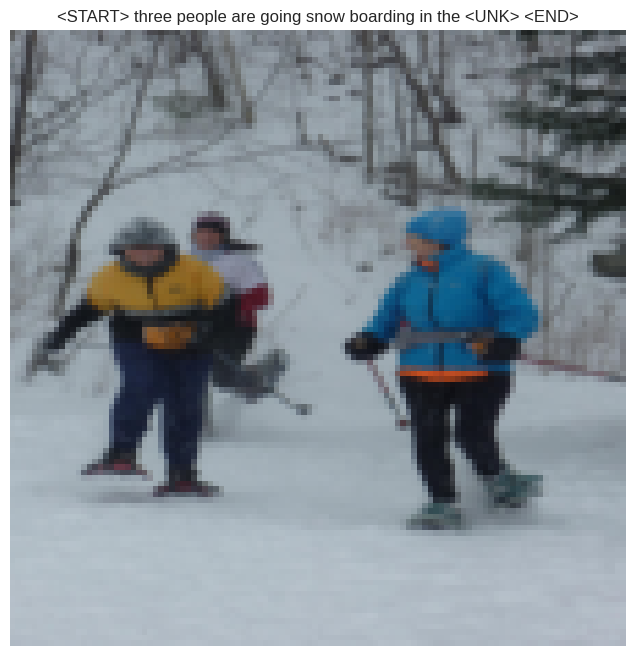

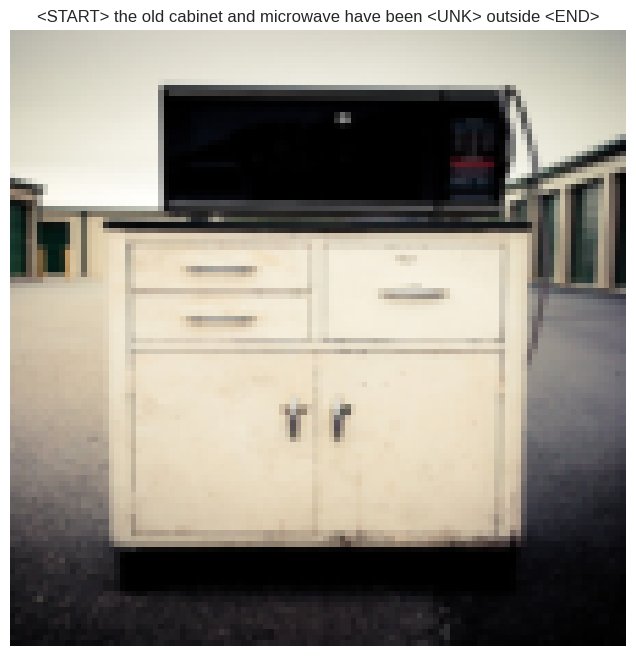

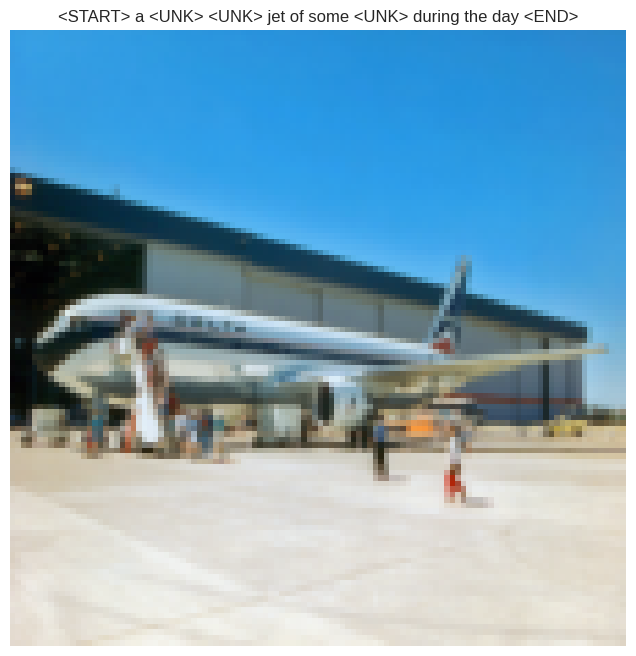

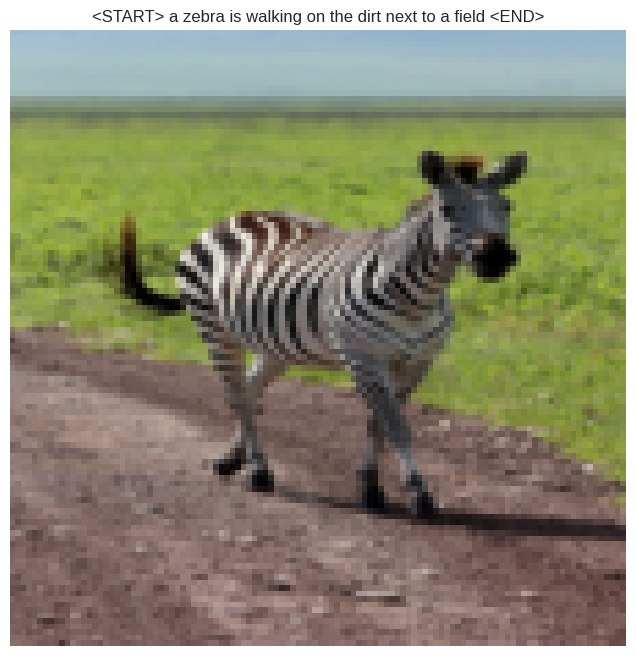

In [9]:
from p4_utils import decode_captions


# Sample a minibatch and show the reshaped 112x112 images and captions
sample_idx = torch.randint(0, num_train, (VIS_BATCH_SIZE, ))
sample_images = data_dict["train_images"][sample_idx]
sample_captions = data_dict["train_captions"][sample_idx]
for i in range(VIS_BATCH_SIZE):
    plt.imshow(sample_images[i].permute(1, 2, 0))
    plt.axis("off")
    caption_str = decode_captions(
        sample_captions[i], data_dict["vocab"]["idx_to_token"]
    )
    plt.title(caption_str)
    plt.show()

# Part 1 - Recurrent Neural Networks (RNNs)
As discussed in lecture, we will use Recurrent Neural Network (RNN) language models for image captioning. We will cover the standard RNN model first and later LSTM and attention-based language models.

## Part 1.1 - RNN: Step Forward

First implement the `rnn_step_forward` for a single timestep of a standard recurrent neural network.
Run the following to check your implementation. You should see errors on the order of `1e-8` or less.

In [10]:
from rnn_lstm_captioning import rnn_step_forward

N, D, H = 3, 10, 4

x = torch.linspace(-0.4, 0.7, steps=N * D, device=DEVICE, dtype=DTYPE).view(N, D)
prev_h = torch.linspace(-0.2, 0.5, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
Wx = torch.linspace(-0.1, 0.9, steps=D * H, device=DEVICE, dtype=DTYPE).view(D, H)
Wh = torch.linspace(-0.3, 0.7, steps=H * H, device=DEVICE, dtype=DTYPE).view(H, H)
b = torch.linspace(-0.2, 0.4, steps=H, device=DEVICE, dtype=DTYPE)


next_h, _ = rnn_step_forward(x, prev_h, Wx, Wh, b)
expected_next_h = torch.tensor(
    [
        [-0.58172089, -0.50182032, -0.41232771, -0.31410098],
        [0.66854692, 0.79562378, 0.87755553, 0.92795967],
        [0.97934501, 0.99144213, 0.99646691, 0.99854353],
    ],
    device=DEVICE, dtype=DTYPE
)

print("next_h error: ", rel_error(expected_next_h, next_h))

next_h error:  2.3200594408551194e-09


## Part 1.2 - RNN: Step Backward
Implement the `rnn_step_backward` for a single timestep of a standard recurrent neural network. Run the following to numerically gradient check your implementation. You should see errors on the order of `1e-8` or less if using **double** (`torch.float64`) precision, or `1e-3` or less if using **single** (`torch.float32`) precision.

In [11]:
from rnn_lstm_captioning import rnn_step_backward


reset_seed(0)

N, D, H = 4, 5, 6
x = torch.randn(N, D, device=DEVICE, dtype=DTYPE)
h = torch.randn(N, H, device=DEVICE, dtype=DTYPE)
Wx = torch.randn(D, H, device=DEVICE, dtype=DTYPE)
Wh = torch.randn(H, H, device=DEVICE, dtype=DTYPE)
b = torch.randn(H, device=DEVICE, dtype=DTYPE)

out, cache = rnn_step_forward(x, h, Wx, Wh, b)

dnext_h = torch.randn(*out.shape, device=DEVICE, dtype=DTYPE)

fx = lambda x: rnn_step_forward(x, h, Wx, Wh, b)[0]
fh = lambda h: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_step_forward(x, h, Wx, Wh, b)[0]
fb = lambda b: rnn_step_forward(x, h, Wx, Wh, b)[0]

dx_num = compute_numeric_gradient(fx, x, dnext_h)
dprev_h_num = compute_numeric_gradient(fh, h, dnext_h)
dWx_num = compute_numeric_gradient(fWx, Wx, dnext_h)
dWh_num = compute_numeric_gradient(fWh, Wh, dnext_h)
db_num = compute_numeric_gradient(fb, b, dnext_h)

# YOUR_TURN: Implement rnn_step_backward
dx, dprev_h, dWx, dWh, db = rnn_step_backward(dnext_h, cache)

print("dx error: ", rel_error(dx_num, dx))
print("dprev_h error: ", rel_error(dprev_h_num, dprev_h))
print("dWx error: ", rel_error(dWx_num, dWx))
print("dWh error: ", rel_error(dWh_num, dWh))
print("db error: ", rel_error(db_num, db))

dx error:  5.1492103032824735e-08
dprev_h error:  2.2560444204737215e-08
dWx error:  5.9113818559286926e-08
dWh error:  2.9418185222865534e-08
db error:  2.6488015040153856e-09


## Part 1.3 - RNN: Forward
Now that you have implemented the forward and backward passes for a single timestep of an RNN, you will combine these pieces to implement an RNN that processes an entire sequence of data. First implement `rnn_forward` by making calls to the `rnn_step_forward` function that you defined earlier.

Run the following to check your implementation. You should see errors on the order of `1e-6` or less.

In [12]:
from rnn_lstm_captioning import rnn_forward


N, T, D, H = 2, 3, 4, 5

x = torch.linspace(-0.1, 0.3, steps=N * T * D, device=DEVICE, dtype=DTYPE).view(N, T, D)
h0 = torch.linspace(-0.3, 0.1, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
Wx = torch.linspace(-0.2, 0.4, steps=D * H, device=DEVICE, dtype=DTYPE).view(D, H)
Wh = torch.linspace(-0.4, 0.1, steps=H * H, device=DEVICE, dtype=DTYPE).view(H, H)
b = torch.linspace(-0.7, 0.1, steps=H, device=DEVICE, dtype=DTYPE)

# YOUR_TURN: Implement rnn_forward
h, _ = rnn_forward(x, h0, Wx, Wh, b)
expected_h = torch.tensor(
    [
        [
            [-0.42070749, -0.27279261, -0.11074945, 0.05740409, 0.22236251],
            [-0.39525808, -0.22554661, -0.0409454, 0.14649412, 0.32397316],
            [-0.42305111, -0.24223728, -0.04287027, 0.15997045, 0.35014525],
        ],
        [
            [-0.55857474, -0.39065825, -0.19198182, 0.02378408, 0.23735671],
            [-0.27150199, -0.07088804, 0.13562939, 0.33099728, 0.50158768],
            [-0.51014825, -0.30524429, -0.06755202, 0.17806392, 0.40333043],
        ],
    ],
    device=DEVICE, dtype=DTYPE
)
print("h error: ", rel_error(expected_h, h))

h error:  4.242275290213816e-09


## Part 1.4 - RNN: Backward
Implement the `rnn_backward` for an RNN. This should run back-propagation over the entire sequence, making calls to the `rnn_step_backward` function that you defined earlier.

You should see errors on the order of `1e-8` or less if using **double** (`torch.float64`) precision, or `1e-2` or less if using **single** (`torch.float32`) precision.

In [13]:
from rnn_lstm_captioning import rnn_backward, rnn_forward

reset_seed(0)

N, D, T, H = 2, 3, 10, 5

x = torch.randn(N, T, D, device=DEVICE, dtype=DTYPE)
h0 = torch.randn(N, H, device=DEVICE, dtype=DTYPE)
Wx = torch.randn(D, H, device=DEVICE, dtype=DTYPE)
Wh = torch.randn(H, H, device=DEVICE, dtype=DTYPE)
b = torch.randn(H, device=DEVICE, dtype=DTYPE)

out, cache = rnn_forward(x, h0, Wx, Wh, b)

dout = torch.randn(*out.shape, device=DEVICE, dtype=DTYPE)

# YOUR_TURN: Implement rnn_backward
dx, dh0, dWx, dWh, db = rnn_backward(dout, cache)

fx = lambda x: rnn_forward(x, h0, Wx, Wh, b)[0]
fh0 = lambda h0: rnn_forward(x, h0, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_forward(x, h0, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_forward(x, h0, Wx, Wh, b)[0]
fb = lambda b: rnn_forward(x, h0, Wx, Wh, b)[0]

dx_num = compute_numeric_gradient(fx, x, dout)
dh0_num = compute_numeric_gradient(fh0, h0, dout)
dWx_num = compute_numeric_gradient(fWx, Wx, dout)
dWh_num = compute_numeric_gradient(fWh, Wh, dout)
db_num = compute_numeric_gradient(fb, b, dout)

print("dx error: ", rel_error(dx_num, dx))
print("dh0 error: ", rel_error(dh0_num, dh0))
print("dWx error: ", rel_error(dWx_num, dWx))
print("dWh error: ", rel_error(dWh_num, dWh))
print("db error: ", rel_error(db_num, db))

dx error:  6.756003107923004e-08
dh0 error:  4.4040539189096935e-08
dWx error:  1.6485164347603059e-07
dWh error:  1.0584898924836356e-07
db error:  1.3319573511137121e-08


### RNN: Backward with Autograd

Now we will entirely depend on the PyTorch autograd module (`torch.autograd`) to compute the backward pass of RNN.
`torch.autograd` provides classes and functions implementing **automatic differentiation** of arbitrary scalar valued functions.
It requires minimal changes to the existing code - if you pass tensors with `requires_grad=True` to the forward function you wrote earlier, you can just call `.backward(gradient=grad)` on the output to compute gradients on the input and weights.

**Refer to Lecture 12 and *Python and Data Science Programming Resources* resources on Brightspace**

**Note: If you receive a `RuntimeError` related to an in-place operation, you may need to `.clone()` one or more of the tensors being updated during the `rnn_forward` loop. You can uncomment the line `torch.autograd.set_detect_anomaly(True)` below to help trace the error**

Now we can compare the manual backward pass with the autograd backward pass. Read the code in following cell, and execute it to compare your implementation with `torch.autograd`.

You should get a relative error on the order of `1e-10` if using **double** (`torch.float64`) precision, or `1e-7` or less if using **single** (`torch.float32`) precision.

In [14]:
reset_seed(0)

N, D, T, H = 2, 3, 10, 5

# set requires_grad=True
x = torch.randn(N, T, D, device=DEVICE, dtype=DTYPE, requires_grad=True)
h0 = torch.randn(N, H, device=DEVICE, dtype=DTYPE, requires_grad=True)
Wx = torch.randn(D, H, device=DEVICE, dtype=DTYPE, requires_grad=True)
Wh = torch.randn(H, H, device=DEVICE, dtype=DTYPE, requires_grad=True)
b = torch.randn(H, device=DEVICE, dtype=DTYPE, requires_grad=True)

out, cache = rnn_forward(x, h0, Wx, Wh, b)

dout = torch.randn(*out.shape, device=DEVICE, dtype=DTYPE)

# Manual backward:
with torch.no_grad():
    dx, dh0, dWx, dWh, db = rnn_backward(dout, cache)

# Backward with autograd: the magic happens here!
out.backward(dout)

dx_auto, dh0_auto, dWx_auto, dWh_auto, db_auto = (
    x.grad,
    h0.grad,
    Wx.grad,
    Wh.grad,
    b.grad,
)

print("dx error: ", rel_error(dx_auto, dx))
print("dh0 error: ", rel_error(dh0_auto, dh0))
print("dWx error: ", rel_error(dWx_auto, dWx))
print("dWh error: ", rel_error(dWh_auto, dWh))
print("db error: ", rel_error(db_auto, db))

dx error:  1.940674388170321e-16
dh0 error:  2.2836060460754644e-17
dWx error:  3.1057613445099113e-17
dWh error:  8.260278707379766e-17
db error:  1.3268315583600828e-16


### RNN Module

We can now wrap the  RNN implementation into a PyTorch module.
Recall from the past assignment/tutorial: `nn.Module` is a base class for all neural network modules in PyTorch. More details regarding its attributes, functions, and methods could be found [in PyTorch documentation](https://pytorch.org/docs/stable/nn.html?highlight=module#torch.nn.Module).

In short, the weights and biases are declared in `__init__` and function `forward` will call the `rnn_forward` function from before.
The backward function will not be used, and entirely handled by `torch.autograd`.
**We have written this part in `RNN` for you but you are highly recommended to go through the code.**

In [15]:
from rnn_lstm_captioning import RNN, rnn_forward


N, D, T, H = 2, 3, 10, 5

x = torch.randn(N, T, D, device=DEVICE, dtype=DTYPE)
h0 = torch.randn(N, H, device=DEVICE, dtype=DTYPE)

rnn_module = RNN(D, H).to(device=DEVICE, dtype=DTYPE)

# Call forward in module:
hn1 = rnn_module(x, h0)

# Call without module: (but access weights from module)
# Equivalent to above, we won't do this henceforth.
Wx, Wh, b = rnn_module.Wx, rnn_module.Wh, rnn_module.b
hn2, _ = rnn_forward(x, h0, Wx, Wh, b)

print("Output error with/without module: ", rel_error(hn1, hn2))

Output error with/without module:  0.0


# Part 2 - RNN for Image Captioning

You will implement a few necessary tools and layers in order to build an image captioning model (class `CaptioningRNN`).

## Image Feature Extraction

The first essential component in an image captioning model is an encoder that inputs an image and produces features for decoding the caption.
Here, we use a small [RegNetX-400MF](https://pytorch.org/vision/stable/models.html#torchvision.models.regnet_x_400mf) as the backbone so we can train in a reasonable amount of time on Colab.

It accepts image batches of shape `(N, C, H, W)` and outputs spatial features from final layer that have shape `(N, C, H/32, W/32)`.
For standard RNNs and LSTM, we use the **average pooled features** (shape `(N, C)`) for decoding captions, whereas for attention LSTM we aggregate the spatial features by learning attention weights.

Check out the `ImageEncoder` method in `rnn_lstm_captioning.py` to see the initialization of the model.

We use the implementation from torchvision and put a very thin wrapper module for our use-case.
You do not need to implement anything here; however, you should read and understand the module definition, available in `rnn_lstm_captioning.py`.

In [16]:
from rnn_lstm_captioning import ImageEncoder

model = ImageEncoder(verbose=True).to(device=DEVICE)

Downloading: "https://download.pytorch.org/models/regnet_x_400mf-adf1edd5.pth" to /root/.cache/torch/hub/checkpoints/regnet_x_400mf-adf1edd5.pth
100%|██████████| 21.3M/21.3M [00:00<00:00, 92.7MB/s]


For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])


## Part 2.1 - Word Embedding
In deep learning systems, we commonly represent words using vectors. Each word of the vocabulary will be associated with a vector, and these vectors will be learned jointly with the rest of the system.

Implement the `WordEmbedding` module to convert words (represented by integers) into vectors.
Run the following to check your implementation. You should see an error on the order of `1e-7` or less. 


In [17]:
from rnn_lstm_captioning import WordEmbedding

N, T, V, D = 2, 4, 5, 3

x = torch.tensor([[0, 3, 1, 2], [2, 1, 0, 3]]).long()
W = torch.linspace(0, 1, steps=V * D, device=DEVICE, dtype=DTYPE).view(V, D)

# Copy custom weight vector for sanity check:
model_emb = WordEmbedding(V, D).to(device=DEVICE, dtype=DTYPE)
model_emb.W_embed.data.copy_(W)
out = model_emb(x)
expected_out = torch.tensor(
    [
        [
            [0.0, 0.07142857, 0.14285714],
            [0.64285714, 0.71428571, 0.78571429],
            [0.21428571, 0.28571429, 0.35714286],
            [0.42857143, 0.5, 0.57142857],
        ],
        [
            [0.42857143, 0.5, 0.57142857],
            [0.21428571, 0.28571429, 0.35714286],
            [0.0, 0.07142857, 0.14285714],
            [0.64285714, 0.71428571, 0.78571429],
        ],
    ],
    device=DEVICE, dtype=DTYPE
)

print("out error: ", rel_error(expected_out, out))

out error:  2.727272753724473e-09


## Part 2.2 - Temporal Softmax Loss

In an RNN language model, at every timestep we produce a score for each word in the vocabulary.
This score is obtained by applying an affine transform to the hidden state (think `nn.Linear` module).
We know the ground-truth word at each timestep, so we use a cross-entropy loss at each timestep.
We sum the losses over time and average them over the minibatch.

However there is one wrinkle: since we operate over minibatches and different captions may have different lengths, we append `<NULL>` tokens to the end of each caption so they all have the same length. We don't want these `<NULL>` tokens to count toward the loss or gradient, so in addition to scores and ground-truth labels our loss function also accepts a `ignore_index` that tells it which index in caption should be ignored when computing the loss.

Implement the `temporal_softmax_loss` and run the following cell to check if the implementation is correct.

In [18]:
from rnn_lstm_captioning import temporal_softmax_loss


def check_loss(N, T, V, p):
    x = 0.001 * torch.randn(N, T, V)
    y = torch.randint(V, size=(N, T))
    mask = torch.rand(N, T)
    y[mask > p] = 0

    # YOUR_TURN: Implement temporal_softmax_loss
    print(temporal_softmax_loss(x, y, NULL_index).item())


check_loss(1000, 1, 10, 1.0)  # Should be about 2.00-2.11
check_loss(1000, 10, 10, 1.0)  # Should be about 20.6-21.0
check_loss(5000, 10, 10, 0.1)  # Should be about 2.00-2.11

2.097576141357422
20.702716827392578
2.088468074798584


## Part 2.3 - Captioning Module

We will now combine the above parts into the `CaptioningRNN` module. Implement the module by following its instructions.
This module will have a generic structure for RNN, LSTM, and attention-based LSTM networks that are specified by providing the `cell_type` argument: (one of `["rnn", "lstm", "attn"]`).

For now you only need to implement for the case where `cell_type="rnn"`; you will come back to this module for the other two cases later in this assignment.

Also skip the inference function (`CaptioningRNN.sample`) for now: only implement `__init__` and `forward`.

Run the following to check your forward pass using a small test case; you should see difference on the order of `1e-7` or less.

In [19]:
from rnn_lstm_captioning import CaptioningRNN

reset_seed(0)

N, D, W, H = 10, 400, 30, 40
word_to_idx = {"<NULL>": 0, "cat": 2, "dog": 3}
V = len(word_to_idx)
T = 13

model = CaptioningRNN(
    word_to_idx,
    input_dim=D,
    wordvec_dim=W,
    hidden_dim=H,
    cell_type="rnn",
    ignore_index=NULL_index,
)
# Copy parameters for sanity check:
for k, v in model.named_parameters():
    v.data.copy_(torch.linspace(-1.4, 1.3, steps=v.numel()).view(*v.shape))

images = torch.randn(N, 3, *IMAGE_SHAPE)
captions = (torch.arange(N * T) % V).view(N, T)

loss = model(images, captions).item()
expected_loss = 150.6090393066

print("loss: ", loss)
print("expected loss: ", expected_loss)
print("difference: ", rel_error(torch.tensor(loss), torch.tensor(expected_loss)))

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
loss:  150.60903930664062
expected loss:  150.6090393066
difference:  0.0


### Overfitting on a Small Dataset

To make sure that everything is working as expected, we can try to overfit this image captioning model to a small subset of data.

We have implemented the `train_captioner` function which accepts the model and training data, and runs a simple training loop - passing data to model, collecting training loss, then calling `backward()` to obtain gradients. These gradients are optimized using the [AdamW optimizer](https://arxiv.org/abs/1711.05101) (supported by PyTorch). You can review its implementation in `p4_utils.py`. 

We will overfit on a subset of 50 examples.

You should see a final loss of less than `0.5` and it should be done fairly quickly.

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.001
(Epoch 0 / 80) loss: 74.9983 time per epoch: 1.0s
(Epoch 1 / 80) loss: 69.2916 time per epoch: 0.1s
(Epoch 2 / 80) loss: 63.8102 time per epoch: 0.1s
(Epoch 3 / 80) loss: 58.1413 time per epoch: 0.1s
(Epoch 4 / 80) loss: 52.8625 time per epoch: 0.1s
(Epoch 5 / 80) loss: 47.8938 time per epoch: 0.1s
(Epoch 6 / 80) loss: 43.5161 time per epoch: 0.1s
(Epoch 7 / 80) loss: 39.9040 time per epoch: 0.1s
(Epoch 8 / 80) loss: 36.9896 time per epoch: 0.1s
(Epoch 9 / 80) loss: 34.5876 time per epoch: 0.1s
(Epoch 10 / 80) loss: 32.5321 time per epoch: 0.1s
(Epoch 11 / 80) loss: 30.3775 time per epoch: 0.1s
(Epoch 12 / 80) loss: 28.3181 time per epoch: 0.1s
(Epoch 13 / 80) loss: 26.5743 time per epoch: 0.1s
(Epoch 14 / 80) loss: 24.8641 time per epoch: 0.1s
(Epoch 15 / 80) loss: 23.1807 time per epoch: 0.1s
(Epoch 16 / 80) loss: 21.5229 time per epoch: 0.1s
(Epoch

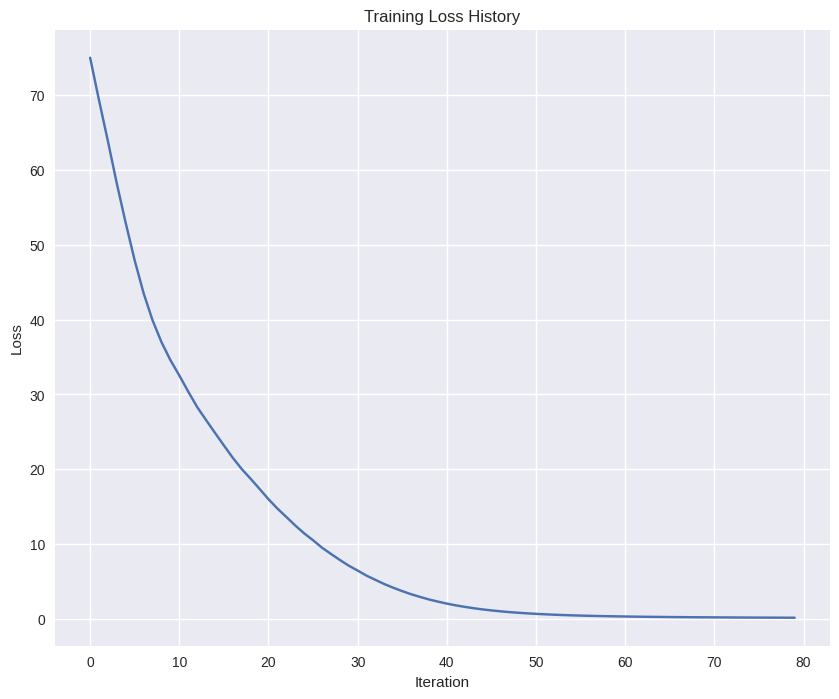

In [20]:
from p4_utils import train_captioner

reset_seed(0)

# data input
small_num_train = 50
sample_idx = torch.linspace(0, num_train - 1, steps=small_num_train).long()
small_image_data = data_dict["train_images"][sample_idx].to(DEVICE)
small_caption_data = data_dict["train_captions"][sample_idx].to(DEVICE)

# optimization arguments
num_epochs = 80

# create the image captioning model
model = CaptioningRNN(
    cell_type="rnn",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)
model = model.to(device=DEVICE, dtype=DTYPE)

for learning_rate in [1e-3]:
    print("learning rate is: ", learning_rate)
    rnn_overfit, _ = train_captioner(
        model,
        small_image_data,
        small_caption_data,
        num_epochs=num_epochs,
        batch_size=OVR_BATCH_SIZE,
        learning_rate=learning_rate,
        device=DEVICE,
    )

## Part 2.4 - Inference (Sampling Captions) and Full Model Training

Unlike classification models, image captioning models behave very differently at training time and at test time.
At training time, we have access to the ground-truth caption, so we feed ground-truth words as input to the RNN at each timestep.
At test time, we sample from the distribution over the vocabulary at each timestep, and feed the sample as input to the RNN at the next timestep.

### Implement Sampling
Implement the `CaptioningRNN.sample` for test-time sampling. After doing so, run the following to train a captioning model and sample from the model on both training and validation data.

### Train the RNN Image Captioning Model

Now perform the training on the entire training set. You should see a final loss less than `2.0`, with each epoch taking ~14s - 44s to run depending on the GPU used.

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.001
(Epoch 0 / 60) loss: 46.3334 time per epoch: 6.9s
(Epoch 1 / 60) loss: 39.9311 time per epoch: 6.8s
(Epoch 2 / 60) loss: 35.9322 time per epoch: 6.8s
(Epoch 3 / 60) loss: 33.0057 time per epoch: 6.8s
(Epoch 4 / 60) loss: 30.5401 time per epoch: 6.8s
(Epoch 5 / 60) loss: 28.1247 time per epoch: 6.8s
(Epoch 6 / 60) loss: 26.2516 time per epoch: 6.8s
(Epoch 7 / 60) loss: 24.4638 time per epoch: 6.8s
(Epoch 8 / 60) loss: 23.2408 time per epoch: 6.8s
(Epoch 9 / 60) loss: 21.6951 time per epoch: 6.8s
(Epoch 10 / 60) loss: 20.1056 time per epoch: 6.8s
(Epoch 11 / 60) loss: 18.6301 time per epoch: 6.8s
(Epoch 12 / 60) loss: 17.7921 time per epoch: 6.8s
(Epoch 13 / 60) loss: 16.8569 time per epoch: 6.8s
(Epoch 14 / 60) loss: 15.8626 time per epoch: 6.8s
(Epoch 15 / 60) loss: 15.0020 time per epoch: 6.8s
(Epoch 16 / 60) loss: 13.7642 time per epoch: 6.8s
(Epoch

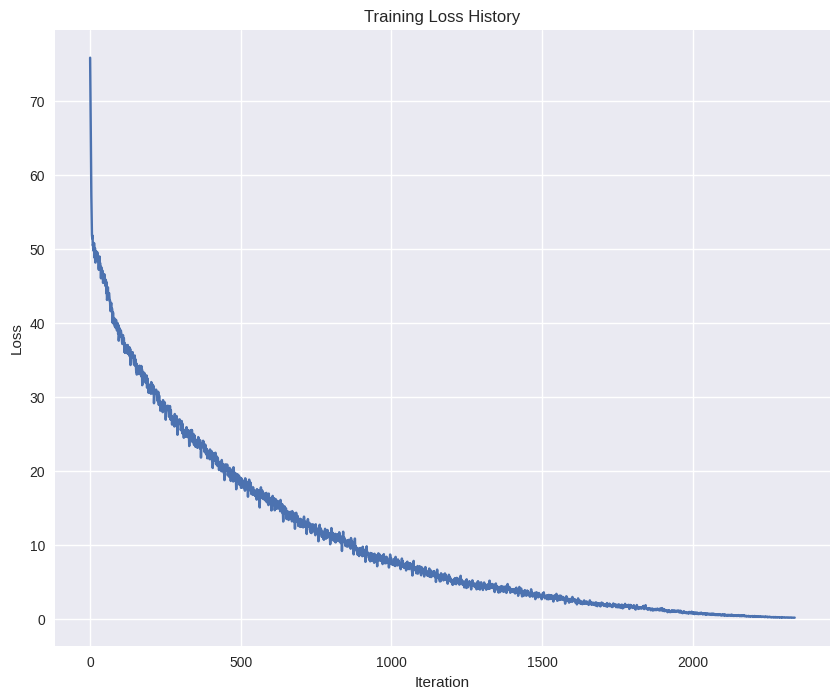

In [21]:
from p4_utils import train_captioner

reset_seed(0)

# data input
small_num_train = num_train
sample_idx = torch.randint(num_train, size=(small_num_train,))
small_image_data = data_dict["train_images"][sample_idx].to(DEVICE)
small_caption_data = data_dict["train_captions"][sample_idx].to(DEVICE)

# create the image captioning model
rnn_model = CaptioningRNN(
    cell_type="rnn",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)

for learning_rate in [1e-3]:
    print("learning rate is: ", learning_rate)
    rnn_model_submit, rnn_loss_submit = train_captioner(
        rnn_model,
        small_image_data,
        small_caption_data,
        num_epochs=60,
        batch_size=BATCH_SIZE,
        learning_rate=learning_rate,
        device=DEVICE,
    )

### Test-time Sampling
The samples on training data should be very good; the samples on validation data will probably make less sense.

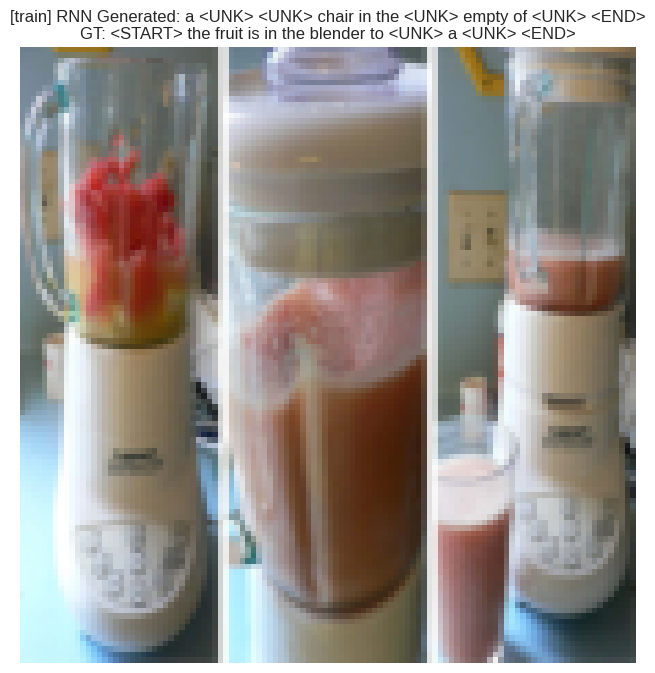

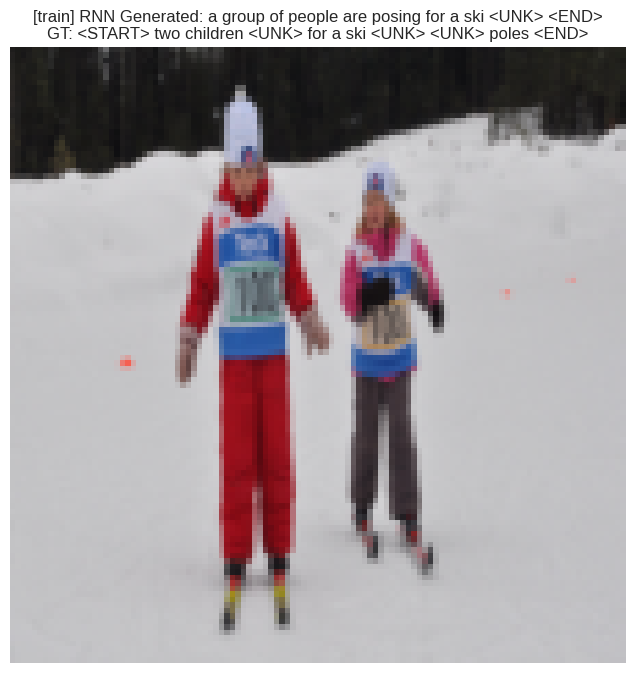

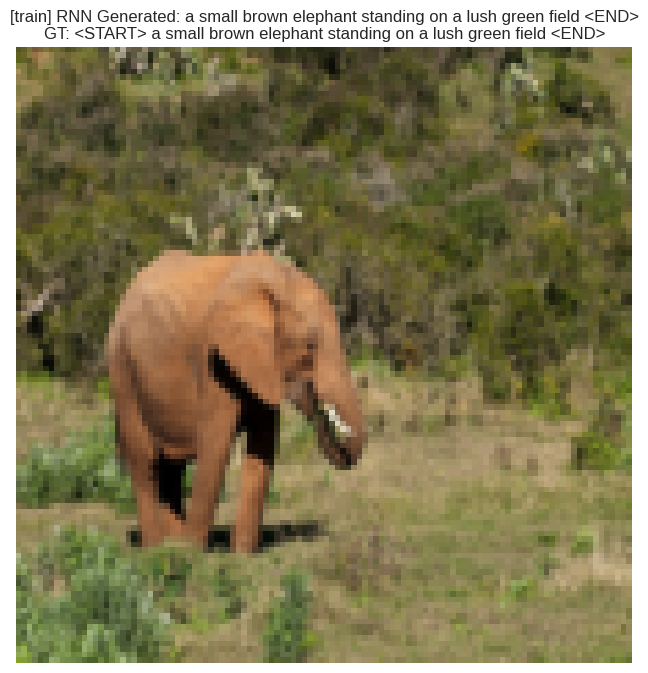

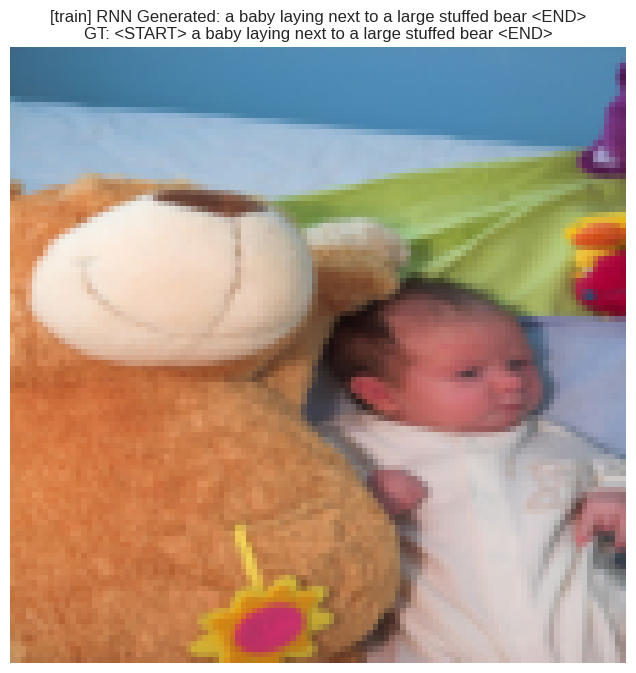

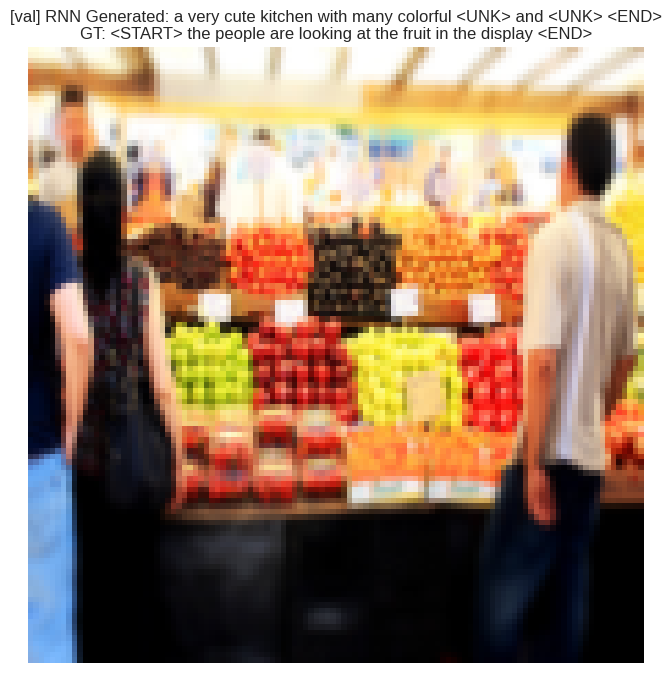

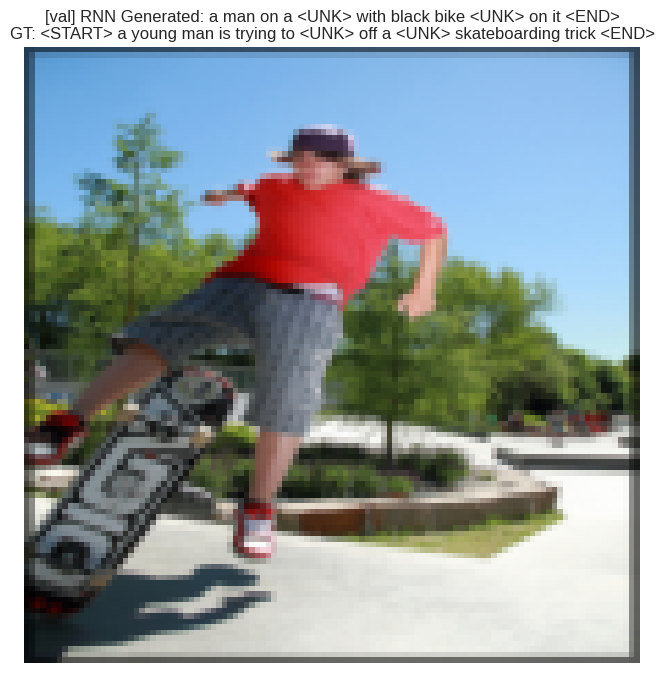

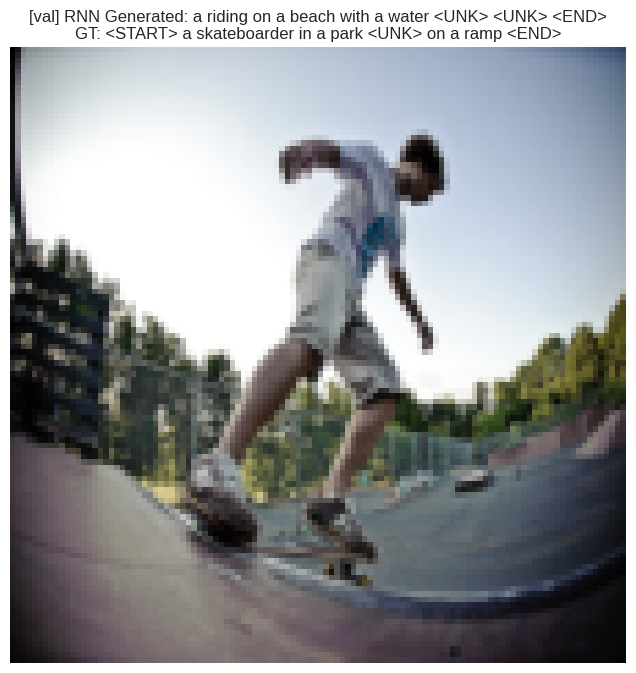

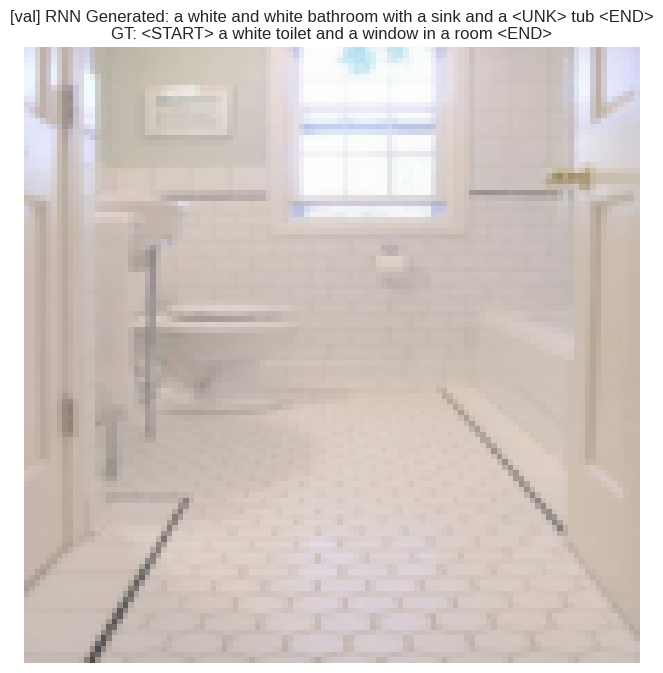

In [22]:
from p4_utils import decode_captions


rnn_model.eval()

for split in ["train", "val"]:
    sample_idx = torch.randint(
        0, num_train if split == "train" else num_val, (VIS_BATCH_SIZE,)
    )
    sample_images = data_dict[split + "_images"][sample_idx]
    sample_captions = data_dict[split + "_captions"][sample_idx]

    # decode_captions is loaded from p4_utils.py
    gt_captions = decode_captions(sample_captions, data_dict["vocab"]["idx_to_token"])

    generated_captions = rnn_model.sample(sample_images.to(DEVICE))
    generated_captions = decode_captions(
        generated_captions, data_dict["vocab"]["idx_to_token"]
    )

    for i in range(VIS_BATCH_SIZE):
        plt.imshow(sample_images[i].permute(1, 2, 0))
        plt.axis("off")
        plt.title(
            f"[{split}] RNN Generated: {generated_captions[i]}\nGT: {gt_captions[i]}"
        )
        plt.show()

# Part 3 - Image Captioning with LSTMs

So far you have implemented a standard RNN and applied it to image captioning. Next we will implement LSTM and use it for image captioning.

**LSTM** stands for [Long-Short Term Memory Networks](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory), a subtype of RNNs.

Standard RNNs can be difficult to train on long sequences due to repeated matrix multiplication that yield vanishing or exploding gradients. LSTMs solve this problem by replacing the simple update rule of the standard RNN with a gating mechanism.

**LSTM Update Rule:** Similar to the standard RNN, at each timestep we receive an input $x_t\in\mathbb{R}^D$ and the previous hidden state $h_{t-1}\in\mathbb{R}^H$; the LSTM also maintains an $H$-dimensional *cell state*, so we also receive the previous cell state $c_{t-1}\in\mathbb{R}^H$. The learnable parameters of the LSTM are an *input-to-hidden* matrix $W_x\in\mathbb{R}^{4H\times D}$, a *hidden-to-hidden* matrix $W_h\in\mathbb{R}^{4H\times H}$ and a *bias vector* $b\in\mathbb{R}^{4H}$.

At each timestep we first compute an *activation vector* $a\in\mathbb{R}^{4H}$ as $a=W_xx_t + W_hh_{t-1}+b$. We then divide this into four vectors $a_i,a_f,a_o,a_g\in\mathbb{R}^H$, where $a_i$ consists of the first $H$ elements of $a$, $a_f$ is the next $H$ elements of $a$, etc. We then compute the *input gate* $g\in\mathbb{R}^H$, *forget gate* $f\in\mathbb{R}^H$, *output gate* $o\in\mathbb{R}^H$, and *block input* $g\in\mathbb{R}^H$ as

$$
\begin{align*}
i = \sigma(a_i) \hspace{2pc}
f = \sigma(a_f) \hspace{2pc}
o = \sigma(a_o) \hspace{2pc}
g = \tanh(a_g),
\end{align*}
$$

where $\sigma$ is the sigmoid function and $\tanh$ is the hyperbolic tangent, both applied element-wise.

Finally we compute the next cell state $c_t$ and next hidden state $h_t$ as

$$
c_{t} = f\odot c_{t-1} + i\odot g \hspace{4pc}
h_t = o\odot\tanh(c_t),
$$

where $\odot$ is the elementwise product of vectors.

In the rest of the notebook we will implement the LSTM update rule and apply it to the image captioning task.

In the code, we assume that data is stored in batches so that $X_t \in \mathbb{R}^{N\times D}$, and will work with *transposed* versions of the parameters: $W_x \in \mathbb{R}^{D \times 4H}$, $W_h \in \mathbb{R}^{H\times 4H}$ so that activations $A \in \mathbb{R}^{N\times 4H}$ can be computed efficiently as $A = X_t W_x + H_{t-1} W_h$

## Part 3.1 - LSTM: Step Forward

Implement the forward pass for a single timestep of an LSTM in the `LSTM.step_forward()` function.
This should be similar to the `rnn_step_forward` function that you implemented above, but using the LSTM update rule instead.
Since `LSTM` extends the PyTorch `nn.Module`, you don't need to implement backward part!

Once you are done, run the following to perform a simple test of your implementation. You should see errors on the order of `1e-7` or less.

In [23]:
from rnn_lstm_captioning import LSTM


N, D, H = 3, 4, 5
x = torch.linspace(-0.4, 1.2, steps=N * D, device=DEVICE, dtype=DTYPE).view(N, D)
prev_h = torch.linspace(-0.3, 0.7, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
prev_c = torch.linspace(-0.4, 0.9, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
Wx = torch.linspace(-2.1, 1.3, steps=4 * D * H, device=DEVICE, dtype=DTYPE).view(D, 4 * H)
Wh = torch.linspace(-0.7, 2.2, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)
b = torch.linspace(0.3, 0.7, steps=4 * H, device=DEVICE, dtype=DTYPE)


# Create module and copy weight tensors for sanity check:
model = LSTM(D, H).to(device=DEVICE, dtype=DTYPE)
model.Wx.data.copy_(Wx)
model.Wh.data.copy_(Wh)
model.b.data.copy_(b)

next_h, next_c = model.step_forward(x, prev_h, prev_c)

expected_next_h = torch.tensor(
    [
        [0.24635157, 0.28610883, 0.32240467, 0.35525807, 0.38474904],
        [0.49223563, 0.55611431, 0.61507696, 0.66844003, 0.7159181],
        [0.56735664, 0.66310127, 0.74419266, 0.80889665, 0.858299],
    ],
    device=DEVICE, dtype=DTYPE
)
expected_next_c = torch.tensor(
    [
        [0.32986176, 0.39145139, 0.451556, 0.51014116, 0.56717407],
        [0.66382255, 0.76674007, 0.87195994, 0.97902709, 1.08751345],
        [0.74192008, 0.90592151, 1.07717006, 1.25120233, 1.42395676],
    ],
    device=DEVICE, dtype=DTYPE
)

print("next_h error: ", rel_error(expected_next_h, next_h))
print("next_c error: ", rel_error(expected_next_c, next_c))

next_h error:  2.606541143878583e-09
next_c error:  1.7376745523804369e-09


## Part 3.2 - LSTM: Forward

Implement the `LSTM.forward()` function to run an LSTM forward on an entire time-series of data.

When you are done, run the following to check your implementation. You should see an error on the order of `1e-7` or less.

In [24]:
N, D, H, T = 2, 5, 4, 3
x = torch.linspace(-0.4, 0.6, steps=N * T * D, device=DEVICE, dtype=DTYPE).view(N, T, D)
h0 = torch.linspace(-0.4, 0.8, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
Wx = torch.linspace(-0.2, 0.9, steps=4 * D * H, device=DEVICE, dtype=DTYPE).view(D, 4 * H)
Wh = torch.linspace(-0.3, 0.6, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)
b = torch.linspace(0.2, 0.7, steps=4 * H, device=DEVICE, dtype=DTYPE)


# Create module and copy weight tensors for sanity check:
model = LSTM(D, H).to(device=DEVICE, dtype=DTYPE)
model.Wx.data.copy_(Wx)
model.Wh.data.copy_(Wh)
model.b.data.copy_(b)

hn = model(x, h0)

expected_hn = torch.tensor(
    [
        [
            [0.01764008, 0.01823233, 0.01882671, 0.0194232],
            [0.11287491, 0.12146228, 0.13018446, 0.13902939],
            [0.31358768, 0.33338627, 0.35304453, 0.37250975],
        ],
        [
            [0.45767879, 0.4761092, 0.4936887, 0.51041945],
            [0.6704845, 0.69350089, 0.71486014, 0.7346449],
            [0.81733511, 0.83677871, 0.85403753, 0.86935314],
        ],
    ],
    device=DEVICE, dtype=DTYPE
)

print("hn error: ", rel_error(expected_hn, hn))

hn error:  2.668523515654886e-09


## Part 3.3 - LSTM Captioning Model

Now that you have implemented the `LSTM` module, update the `CaptioningRNN` module (`__init__` and `forward` implementation method **ONLY**) to also handle the case where `self.cell_type` is `lstm`.

**This should require adding less than 5 lines of code.**

Once you have done so, run the following to check your implementation. You should see a difference on the order of `1e-7` or less.

In [25]:
from rnn_lstm_captioning import CaptioningRNN

N, D, W, H = 10, 400, 30, 40
word_to_idx = {"<NULL>": 0, "cat": 2, "dog": 3}
V = len(word_to_idx)
T = 13

# YOUR_TURN: Implement CaptioningRNN for LSTM
model = CaptioningRNN(
    word_to_idx,
    input_dim=D,
    wordvec_dim=W,
    hidden_dim=H,
    cell_type="lstm",
    ignore_index=NULL_index,
)

model = model.to(DEVICE)

for k, v in model.named_parameters():
    # print(k, v.shape) # uncomment this to see the weight shape
    v.data.copy_(torch.linspace(-1.4, 1.3, steps=v.numel()).view(*v.shape))

images = torch.linspace(
    -3.0, 3.0, steps=(N * 3 * IMAGE_SHAPE[0] * IMAGE_SHAPE[1]),
).view(N, 3, *IMAGE_SHAPE)
captions = (torch.arange(N * T) % V).view(N, T)

loss = model(images.to(DEVICE), captions.to(DEVICE))
expected_loss = torch.tensor(146.3161468505)

print("loss: ", loss.item())
print("expected loss: ", expected_loss.item())
print("difference: ", rel_error(loss, expected_loss))

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
loss:  146.31614685058594
expected loss:  146.31614685058594
difference:  0.0


### Overfitting on a Small Dataset
We have written this part for you. Run the following to overfit an LSTM captioning model on the same small dataset as we used for the RNN previously. You should see a final loss less than `4` after 80 epochs and it should run fairly quickly.

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.01
(Epoch 0 / 80) loss: 74.9436 time per epoch: 0.7s
(Epoch 1 / 80) loss: 71.1831 time per epoch: 0.5s
(Epoch 2 / 80) loss: 51.5172 time per epoch: 0.6s
(Epoch 3 / 80) loss: 46.2220 time per epoch: 0.5s
(Epoch 4 / 80) loss: 48.0527 time per epoch: 0.5s
(Epoch 5 / 80) loss: 45.1746 time per epoch: 0.6s
(Epoch 6 / 80) loss: 44.3536 time per epoch: 0.5s
(Epoch 7 / 80) loss: 42.9944 time per epoch: 0.5s
(Epoch 8 / 80) loss: 41.4099 time per epoch: 0.5s
(Epoch 9 / 80) loss: 39.7965 time per epoch: 0.5s
(Epoch 10 / 80) loss: 37.8422 time per epoch: 0.5s
(Epoch 11 / 80) loss: 35.5078 time per epoch: 0.5s
(Epoch 12 / 80) loss: 33.0828 time per epoch: 0.5s
(Epoch 13 / 80) loss: 30.7479 time per epoch: 0.5s
(Epoch 14 / 80) loss: 28.4449 time per epoch: 0.5s
(Epoch 15 / 80) loss: 25.9859 time per epoch: 0.5s
(Epoch 16 / 80) loss: 23.6014 time per epoch: 0.5s
(Epoch 

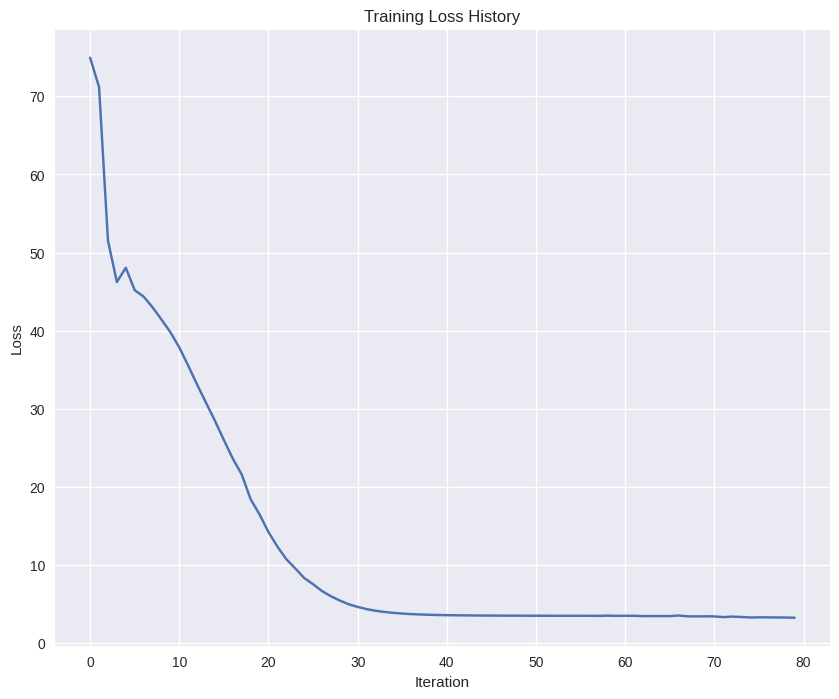

In [26]:
from p4_utils import train_captioner


reset_seed(0)

# Data input.
small_num_train = 50
sample_idx = torch.linspace(0, num_train - 1, steps=small_num_train).long()
small_image_data = data_dict["train_images"][sample_idx].to(DEVICE)
small_caption_data = data_dict["train_captions"][sample_idx].to(DEVICE)

# Create the image captioning model.
model = CaptioningRNN(
    cell_type="lstm",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)
model = model.to(DEVICE)

for learning_rate in [1e-2]:
    print("learning rate is: ", learning_rate)
    lstm_overfit, _ = train_captioner(
        model,
        small_image_data,
        small_caption_data,
        num_epochs=80,
        batch_size=OVR_BATCH_SIZE,
        learning_rate=learning_rate,
    )

## Part 3.4 - Inference (Sampling Captions) and Full Model Training

### Implement LSTM Sampling
Modify the `CaptioningRNN.sample` method in class to handle the case where `self.cell_type` is `lstm`. **This should take fewer than 10 lines of code.**

### Train the LSTM Captioning Model

Now perform the training on the entire training set. You should see a final loss less than `1.8`, with each epoch taking ~7s - 14s to run depending on the GPU used.

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.001
(Epoch 0 / 60) loss: 48.2242 time per epoch: 7.3s
(Epoch 1 / 60) loss: 42.8289 time per epoch: 7.3s
(Epoch 2 / 60) loss: 38.5245 time per epoch: 7.3s
(Epoch 3 / 60) loss: 36.0802 time per epoch: 7.3s
(Epoch 4 / 60) loss: 34.1731 time per epoch: 7.3s
(Epoch 5 / 60) loss: 32.3647 time per epoch: 7.3s
(Epoch 6 / 60) loss: 30.8532 time per epoch: 7.3s
(Epoch 7 / 60) loss: 29.4791 time per epoch: 7.3s
(Epoch 8 / 60) loss: 28.6167 time per epoch: 7.3s
(Epoch 9 / 60) loss: 27.4843 time per epoch: 7.3s
(Epoch 10 / 60) loss: 26.4359 time per epoch: 7.3s
(Epoch 11 / 60) loss: 25.2660 time per epoch: 7.3s
(Epoch 12 / 60) loss: 24.4384 time per epoch: 7.3s
(Epoch 13 / 60) loss: 23.6990 time per epoch: 7.3s
(Epoch 14 / 60) loss: 23.1169 time per epoch: 7.3s
(Epoch 15 / 60) loss: 22.5222 time per epoch: 7.3s
(Epoch 16 / 60) loss: 21.8848 time per epoch: 7.3s
(Epoch

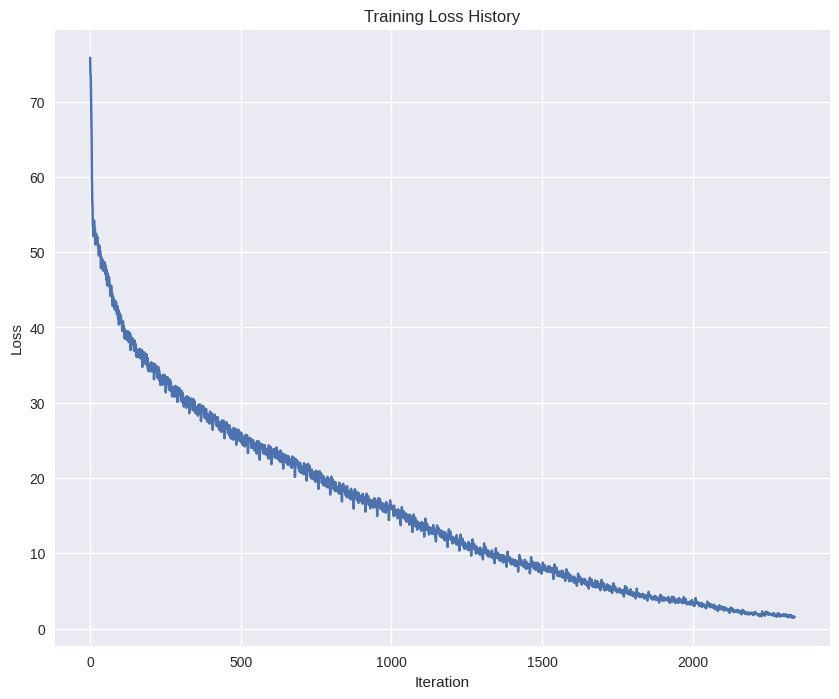

In [27]:
reset_seed(0)

# data input
small_num_train = num_train
sample_idx = torch.randint(num_train, size=(small_num_train,))
small_image_data = data_dict["train_images"][sample_idx]
small_caption_data = data_dict["train_captions"][sample_idx]

# create the image captioning model
lstm_model = CaptioningRNN(
    cell_type="lstm",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)
lstm_model = lstm_model.to(DEVICE)

for learning_rate in [1e-3]:
    print("learning rate is: ", learning_rate)
    lstm_model_submit, lstm_loss_submit = train_captioner(
        lstm_model,
        small_image_data,
        small_caption_data,
        num_epochs=60,
        batch_size=BATCH_SIZE,
        learning_rate=learning_rate,
        device=DEVICE,
    )

### Test-time Sampling
As with the RNN, the samples on training data should be very good; the samples on validation data will probably make less sense.

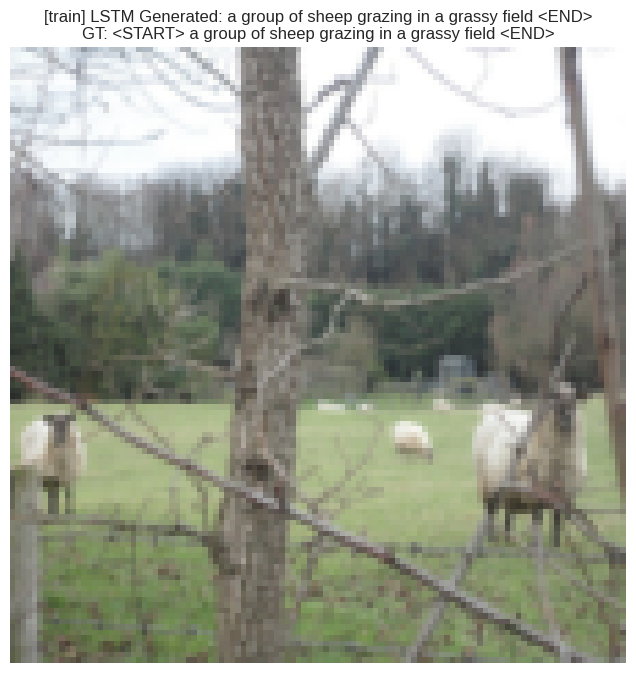

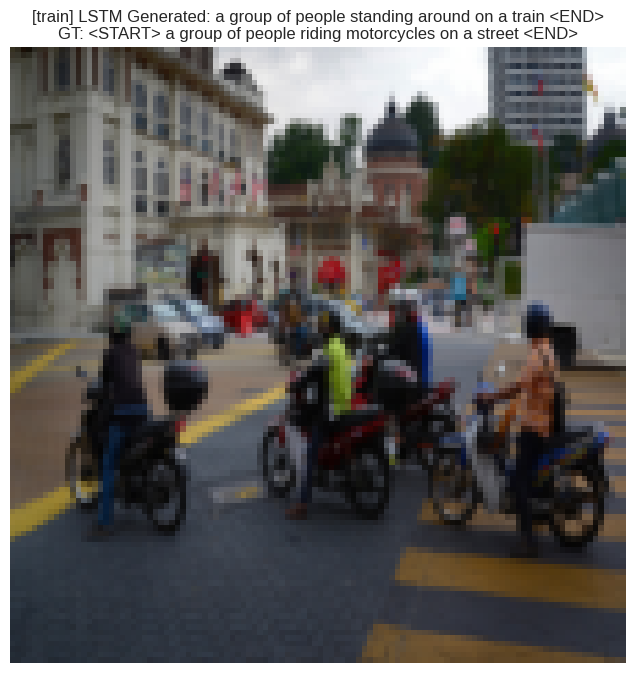

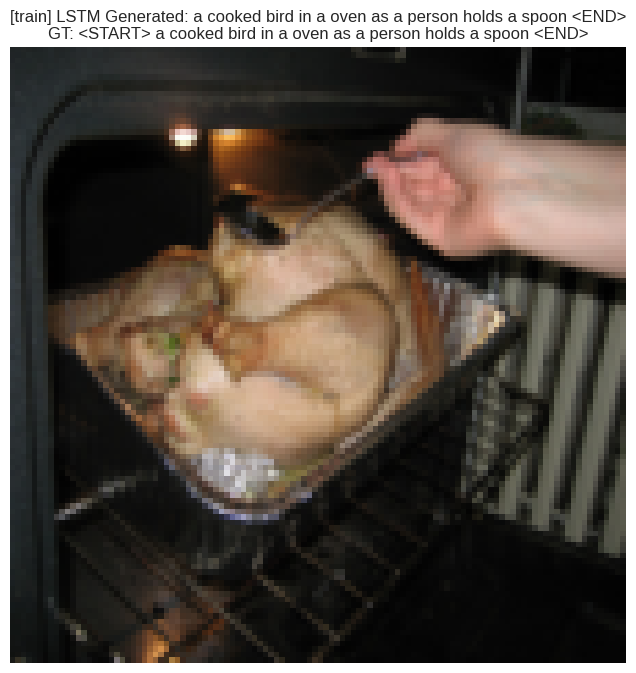

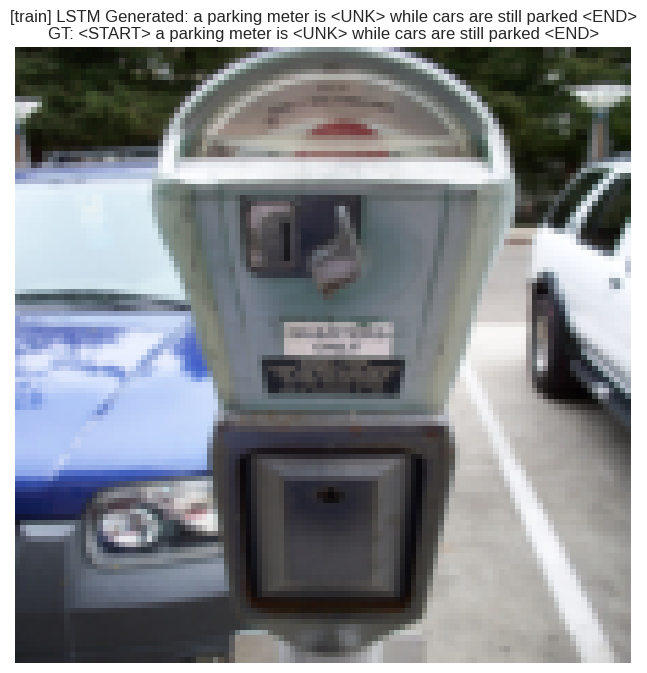

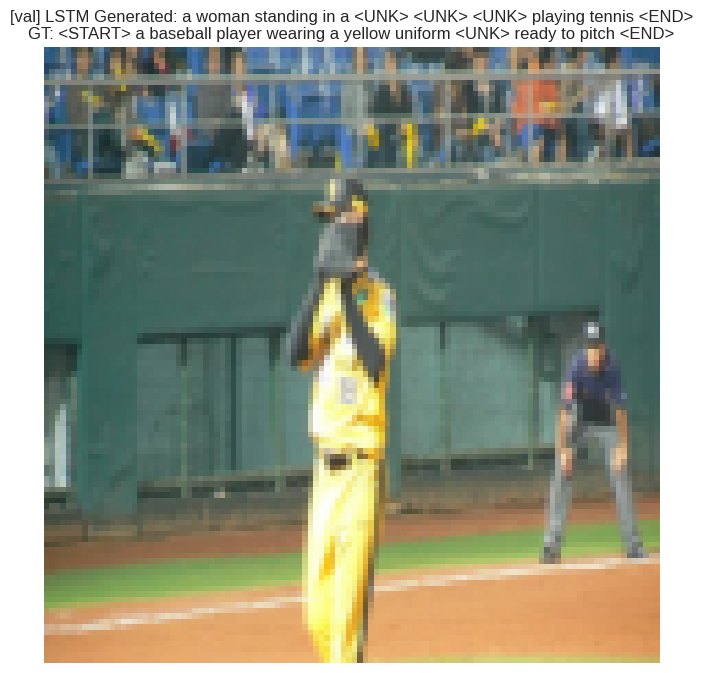

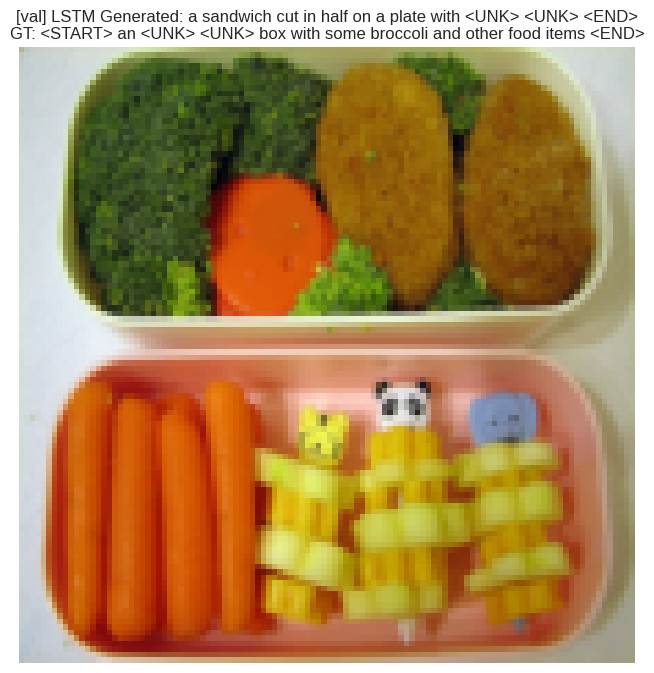

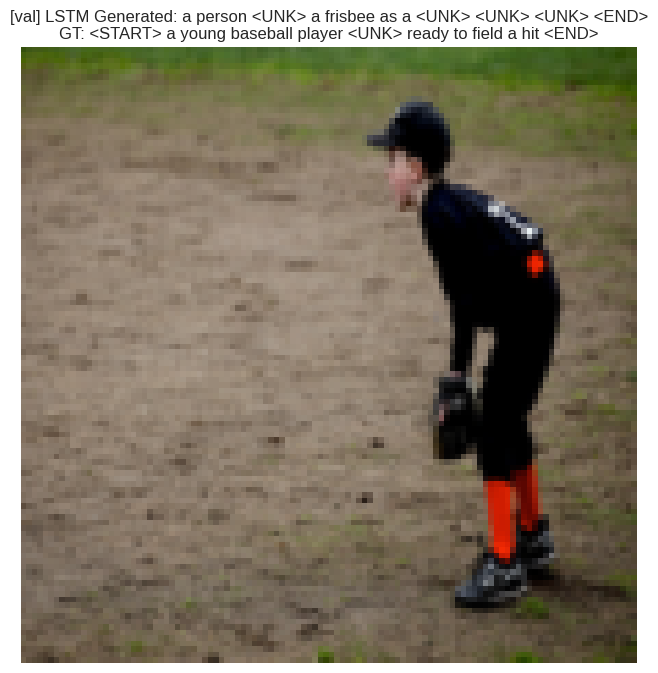

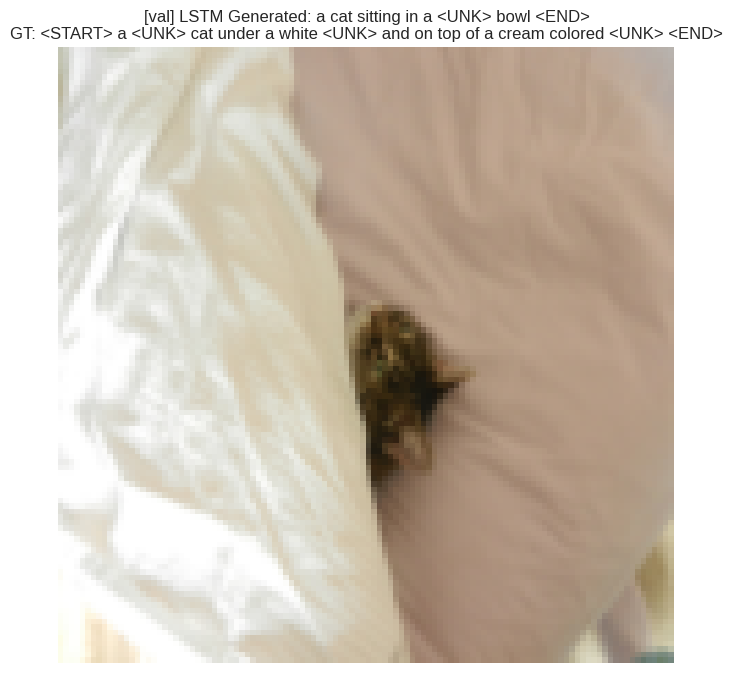

In [28]:
from p4_utils import decode_captions


lstm_model.eval()

for split in ["train", "val"]:
    sample_idx = torch.randint(
        0, num_train if split == "train" else num_val, (VIS_BATCH_SIZE,)
    )
    sample_images = data_dict[split + "_images"][sample_idx]
    sample_captions = data_dict[split + "_captions"][sample_idx]

    # decode_captions is loaded from p4_utils.py
    gt_captions = decode_captions(sample_captions, data_dict["vocab"]["idx_to_token"])
    lstm_model.eval()
    generated_captions = lstm_model.sample(sample_images.to(DEVICE))
    generated_captions = decode_captions(
        generated_captions, data_dict["vocab"]["idx_to_token"]
    )

    for i in range(VIS_BATCH_SIZE):
        plt.imshow(sample_images[i].permute(1, 2, 0))
        plt.axis("off")
        plt.title(
            f"[{split}] LSTM Generated: {generated_captions[i]}\nGT: {gt_captions[i]}"
        )
        plt.show()

# Part 4 - Attention LSTM
Attention LSTM essentially adds an attention input $x_{attn}^t\in\mathbb{R}^H$ into LSTM, along with $x_t\in\mathbb{R}^D$ and the previous hidden state $h_{t-1}\in\mathbb{R}^H$.

To get the attention input $x_{attn}^t$, here we adopt a method called `scaled dot-product attention`, as covered in **Lectures 15 and 16**. We first project the CNN feature activation from $\mathbb{R}^{400\times4\times4}$ to $\mathbb{R}^{H\times4\times4}$ using an affine layer. Given the projected activation $A\in \mathbb{R}^{H\times4\times4}$ and the LSTM hidden state from the previous time step $h_{t-1}$, we formulate the attention weights on $A$ at time step $t$ as $M_{attn}^t=h_{t-1}A/\sqrt{H} \in \mathbb{R}^{4\times4}$.

To simplify the formulation here, we flatten the spatial dimensions of $A$ and $M_{attn}^t$ which gives $\tilde{A}\in \mathbb{R}^{H\times16}$ and $\tilde{M^t}_{attn}=h_{t-1}A\in \mathbb{R}^{16}$.

We add a **`softmax`** activation function on $\tilde{M^t}_{attn}$ so that the attention weights at each time step are normalized and sum up to one.

The attention embedding given the attention weights is then $x_{attn}^t=\tilde{A}\tilde{M^t}_{attn} \in\mathbb{R}^H$. Next, you will implement a batch version of the attention layer we have described here.

## Part 4.1 - Scaled Dot-Product Attention
Implement the `dot_product_attention` function. Given the LSTM hidden state from the previous time step `prev_h` (or $h_{t-1}$) and the projected CNN feature activation `A`, compute the attention weights `attn_weights` (or $\tilde{M^t}_{attn}$ with a reshaping to $\mathbb{R}^{4\times4}$) attention embedding output `attn` (or $x_{attn}^t$) using the formulation we provided.

When you are done, run the following to check your implementation. You should see an error on the order of `1e-7` or less.

In [29]:
from rnn_lstm_captioning import dot_product_attention


N, H = 2, 5
D_a = 4

prev_h = torch.linspace(-0.4, 0.6, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
A = torch.linspace(-0.4, 1.8, steps=N * H * D_a * D_a, device=DEVICE, dtype=DTYPE).view(
    N, H, D_a, D_a
)

# YOUR_TURN: Implement dot_product_attention
attn, attn_weights = dot_product_attention(prev_h, A)

expected_attn = torch.tensor(
    [
        [-0.29784344, -0.07645979, 0.14492386, 0.36630751, 0.58769115],
        [0.81412643, 1.03551008, 1.25689373, 1.47827738, 1.69966103],
    ],
    device=DEVICE, dtype=DTYPE
)
expected_attn_weights = torch.tensor(
    [
        [
            [0.06511126, 0.06475411, 0.06439892, 0.06404568],
            [0.06369438, 0.06334500, 0.06299754, 0.06265198],
            [0.06230832, 0.06196655, 0.06162665, 0.06128861],
            [0.06095243, 0.06061809, 0.06028559, 0.05995491],
        ],
        [
            [0.05717142, 0.05784357, 0.05852362, 0.05921167],
            [0.05990781, 0.06061213, 0.06132473, 0.06204571],
            [0.06277517, 0.06351320, 0.06425991, 0.06501540],
            [0.06577977, 0.06655312, 0.06733557, 0.06812722],
        ],
    ],
    device=DEVICE, dtype=DTYPE
)

print("attn error: ", rel_error(expected_attn, attn))
print("attn_weights error: ", rel_error(expected_attn_weights, attn_weights))

attn error:  1.4410324402829568e-09
attn_weights error:  3.5290517247691244e-08


## Part 4.2 - Attention LSTM: Step Forward

Implement `AttentionLSTM.step_forward()` by following its instructions and input specifications.

It is mostly similar to `LSTM.step_forward()` but has an extra attention input `attn` (or $x_{attn}$) and its embedding weight matrix `Wattn` (or $W_{attn}$); these are defined in `AttentionLSTM.__init__()`.

Hence, at each timestep the *activation vector* $a\in\mathbb{R}^{4H}$ in LSTM cell is formulated as:

$a=W_xx_t + W_hh_{t-1}+W_{attn}x_{attn}^t+b$.

**This should require adding less than 5 lines of code.**

Once you are done, run the following to perform a simple test of your implementation. You should see errors on the order of `1e-8` or less.

In [30]:
from rnn_lstm_captioning import AttentionLSTM


N, D, H = 3, 4, 5

x = torch.linspace(-0.4, 1.2, steps=N * D, device=DEVICE, dtype=DTYPE).view(N, D)
prev_h = torch.linspace(-0.3, 0.7, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
prev_c = torch.linspace(-0.4, 0.9, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)
attn = torch.linspace(0.6, 1.8, steps=N * H, device=DEVICE, dtype=DTYPE).view(N, H)

Wx = torch.linspace(-2.1, 1.3, steps=4 * D * H, device=DEVICE, dtype=DTYPE).view(D, 4 * H)
Wh = torch.linspace(-0.7, 2.2, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)
b = torch.linspace(0.3, 0.7, steps=4 * H, device=DEVICE, dtype=DTYPE)
Wattn = torch.linspace(1.3, 4.2, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)

# Create module and copy weight tensors for sanity check:
model = AttentionLSTM(D, H).to(device=DEVICE, dtype=DTYPE)
model.Wx.data.copy_(Wx)
model.Wh.data.copy_(Wh)
model.b.data.copy_(b)
model.Wattn.data.copy_(Wattn)

next_h, next_c = model.step_forward(x, prev_h, prev_c, attn)


expected_next_h = torch.tensor(
    [
        [0.53704256, 0.59980774, 0.65596820, 0.70569729, 0.74932626],
        [0.78729857, 0.82010653, 0.84828362, 0.87235677, 0.89283167],
        [0.91017981, 0.92483119, 0.93717126, 0.94754073, 0.95623746],
    ],
    device=DEVICE, dtype=DTYPE
)
expected_next_c = torch.tensor(
    [
        [0.59999328, 0.69285041, 0.78570758, 0.87856479, 0.97142202],
        [1.06428558, 1.15714276, 1.24999992, 1.34285708, 1.43571424],
        [1.52857143, 1.62142857, 1.71428571, 1.80714286, 1.90000000],
    ],
    device=DEVICE, dtype=DTYPE
)

print("next_h error: ", rel_error(expected_next_h, next_h))
print("next_c error: ", rel_error(expected_next_c, next_c))

next_h error:  2.425617005126452e-09
next_c error:  1.2938551985068886e-09


## Part 4.3 - Attention LSTM: Forward

Now, implement the `AttentionLSTM.forward()` function to run an attention-based LSTM on an entire timeseries of data. You will have to use the `dot_product_attention` function from outside this module.

When you are done, run the following to check your implementation. You should see an error on the order of `1e-8` or less.

In [31]:
N, D, H, T = 2, 5, 4, 3
D_a = 4

x = torch.linspace(-0.4, 0.6, steps=N * T * D, device=DEVICE, dtype=DTYPE).view(N, T, D)
A = torch.linspace(-0.4, 1.8, steps=N * H * D_a * D_a, device=DEVICE, dtype=DTYPE).view(
    N, H, D_a, D_a
)

Wx = torch.linspace(-0.2, 0.9, steps=4 * D * H, device=DEVICE, dtype=DTYPE).view(D, 4 * H)
Wh = torch.linspace(-0.3, 0.6, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)
Wattn = torch.linspace(1.3, 4.2, steps=4 * H * H, device=DEVICE, dtype=DTYPE).view(H, 4 * H)
b = torch.linspace(0.2, 0.7, steps=4 * H, device=DEVICE, dtype=DTYPE)


# Create module and copy weight tensors for sanity check:
model = AttentionLSTM(D, H).to(device=DEVICE, dtype=DTYPE)
model.Wx.data.copy_(Wx)
model.Wh.data.copy_(Wh)
model.b.data.copy_(b)
model.Wattn.data.copy_(Wattn)

# YOUR_TURN: Implement attention_forward
hn = model(x, A)

expected_hn = torch.tensor(
    [
        [
            [0.56141729, 0.70274849, 0.80000386, 0.86349400],
            [0.89556391, 0.92856726, 0.94950579, 0.96281018],
            [0.96792077, 0.97535465, 0.98039623, 0.98392994],
        ],
        [
            [0.95065880, 0.97135490, 0.98344373, 0.99045552],
            [0.99317679, 0.99607466, 0.99774317, 0.99870293],
            [0.99907382, 0.99946784, 0.99969426, 0.99982435],
        ],
    ],
    device=DEVICE, dtype=DTYPE
)

print("h error: ", rel_error(expected_hn, hn))

h error:  2.487302938381543e-09


## Part 4.4 - Attention LSTM Captioning Model

With all your implementation done so far, you can finally update the implementation of `CaptioningRNN.__init__` and `CaptioningRNN.forward` methods once again.

This time, handle the case where `self.cell_type` is `attn`. **This should require adding less than 10 lines of code.**

Once you have done so, run the following to check your implementation. You should see a difference on the order of `1e-7` or less.

In [33]:
from rnn_lstm_captioning import CaptioningRNN


reset_seed(0)

N, D, W, H = 10, 400, 30, 40
word_to_idx = {"<NULL>": 0, "cat": 2, "dog": 3}
V = len(word_to_idx)
T = 13

# YOUR_TURN: Modify CaptioningRNN for attention
model = CaptioningRNN(
    word_to_idx,
    input_dim=D,
    wordvec_dim=W,
    hidden_dim=H,
    cell_type="attn",
    ignore_index=NULL_index,
)
model = model.to(DEVICE)

for k, v in model.named_parameters():
    # print(k, v.shape) # uncomment this to see the weight shape
    v.data.copy_(torch.linspace(-1.4, 1.3, steps=v.numel()).view(*v.shape))

images = torch.linspace(
    -3.0, 3.0, steps=(N * 3 * IMAGE_SHAPE[0] * IMAGE_SHAPE[1])
).view(N, 3, *IMAGE_SHAPE)
captions = (torch.arange(N * T) % V).view(N, T)

loss = model(images.to(DEVICE), captions.to(DEVICE))
expected_loss = torch.tensor(8.0156393051)

print("loss: ", loss.item())
print("expected loss: ", expected_loss.item())
print("difference: ", rel_error(loss, expected_loss))

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
loss:  8.015642166137695
expected loss:  8.015639305114746
difference:  1.7846502942055498e-07


### Overfitting on a Small Dataset

We have written this part for you. Run the following to overfit an Attention LSTM captioning model on the same small dataset as we used for the RNN previously. You should see a final loss less than `9`.

**Note: If you receive a `RuntimeError` related to an in-place operation, you may need to `.clone()` one or more of the tensors being updated during the `AttentionLSTM.forward` loop. You can uncomment the line `torch.autograd.set_detect_anomaly(True)` below to help trace the error**

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.001
(Epoch 0 / 80) loss: 75.2723 time per epoch: 0.1s
(Epoch 1 / 80) loss: 69.5129 time per epoch: 0.1s
(Epoch 2 / 80) loss: 63.2676 time per epoch: 0.1s
(Epoch 3 / 80) loss: 56.0302 time per epoch: 0.1s
(Epoch 4 / 80) loss: 49.7672 time per epoch: 0.1s
(Epoch 5 / 80) loss: 45.2608 time per epoch: 0.1s
(Epoch 6 / 80) loss: 41.9909 time per epoch: 0.1s
(Epoch 7 / 80) loss: 39.3657 time per epoch: 0.1s
(Epoch 8 / 80) loss: 37.0966 time per epoch: 0.1s
(Epoch 9 / 80) loss: 35.2906 time per epoch: 0.1s
(Epoch 10 / 80) loss: 33.4659 time per epoch: 0.1s
(Epoch 11 / 80) loss: 31.8492 time per epoch: 0.1s
(Epoch 12 / 80) loss: 30.4208 time per epoch: 0.1s
(Epoch 13 / 80) loss: 28.9725 time per epoch: 0.1s
(Epoch 14 / 80) loss: 27.6709 time per epoch: 0.1s
(Epoch 15 / 80) loss: 26.4734 time per epoch: 0.1s
(Epoch 16 / 80) loss: 25.3253 time per epoch: 0.1s
(Epoch

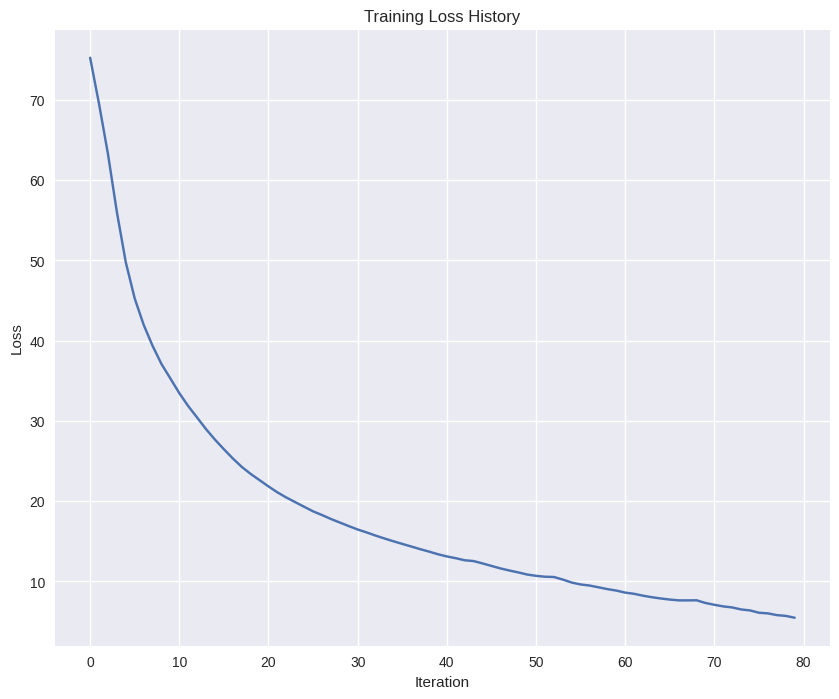

In [34]:
from p4_utils import train_captioner

reset_seed(0)

# data input
small_num_train = 50
sample_idx = torch.linspace(0, num_train - 1, steps=small_num_train).long()
small_image_data = data_dict["train_images"][sample_idx]
small_caption_data = data_dict["train_captions"][sample_idx]

# create the image captioning model
model = CaptioningRNN(
    cell_type="attn",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)


for learning_rate in [1e-3]:
    print("learning rate is: ", learning_rate)
    attn_overfit, _ = train_captioner(
        model,
        small_image_data,
        small_caption_data,
        num_epochs=80,
        batch_size=OVR_BATCH_SIZE,
        learning_rate=learning_rate,
        device=DEVICE,
    )

## Part 4.5 - Inference (Sampling Captions) and Full Model Training

### Implement Attention LSTM Sampling
Modify the `CaptioningRNN.sample` method to handle the case where `self.cell_type` is `attn`. **This should take fewer than 10 lines of code.**

When you are done run the following to train a captioning model and sample from the model on some training and validation set samples.

### Train the Attention LSTM Captioning Model

Now, perform the training on the entire training set. You should see a final loss less than `0.5`. Each epoch should take ~8s to run.

For input images in NCHW format, shape (2, 3, 224, 224)
Shape of output c5 features: torch.Size([2, 400, 7, 7])
learning rate is:  0.001
(Epoch 0 / 60) loss: 48.1913 time per epoch: 8.0s
(Epoch 1 / 60) loss: 45.0924 time per epoch: 8.0s
(Epoch 2 / 60) loss: 40.9593 time per epoch: 8.0s
(Epoch 3 / 60) loss: 37.1826 time per epoch: 8.0s
(Epoch 4 / 60) loss: 33.5077 time per epoch: 8.0s
(Epoch 5 / 60) loss: 30.5348 time per epoch: 8.0s
(Epoch 6 / 60) loss: 28.0371 time per epoch: 8.0s
(Epoch 7 / 60) loss: 25.9013 time per epoch: 8.0s
(Epoch 8 / 60) loss: 23.8327 time per epoch: 8.0s
(Epoch 9 / 60) loss: 21.8199 time per epoch: 8.0s
(Epoch 10 / 60) loss: 19.9314 time per epoch: 8.0s
(Epoch 11 / 60) loss: 18.2473 time per epoch: 8.0s
(Epoch 12 / 60) loss: 16.8405 time per epoch: 8.0s
(Epoch 13 / 60) loss: 15.3039 time per epoch: 8.0s
(Epoch 14 / 60) loss: 13.9548 time per epoch: 8.0s
(Epoch 15 / 60) loss: 12.6693 time per epoch: 8.0s
(Epoch 16 / 60) loss: 11.5901 time per epoch: 8.0s
(Epoch

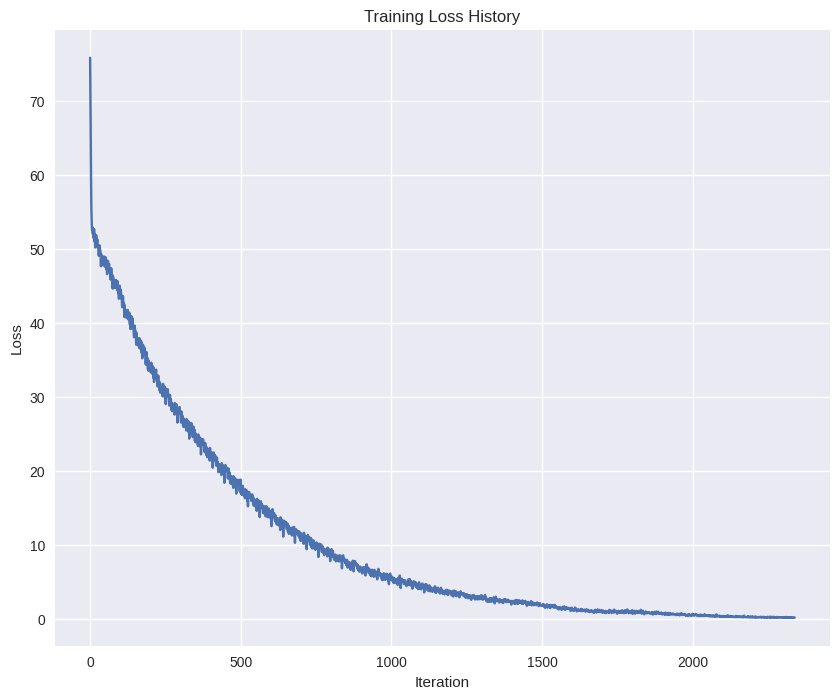

In [35]:
reset_seed(0)

# data input
small_num_train = num_train
sample_idx = torch.randint(num_train, size=(small_num_train,))
small_image_data = data_dict["train_images"][sample_idx]
small_caption_data = data_dict["train_captions"][sample_idx]

# create the image captioning model
attn_model = CaptioningRNN(
    cell_type="attn",
    word_to_idx=data_dict["vocab"]["token_to_idx"],
    input_dim=400,  # hard-coded, do not modify
    hidden_dim=512,
    wordvec_dim=256,
    ignore_index=NULL_index,
)
attn_model = attn_model.to(DEVICE)

for learning_rate in [1e-3]:
    print("learning rate is: ", learning_rate)
    attn_model_submit, attn_loss_submit = train_captioner(
        attn_model,
        small_image_data,
        small_caption_data,
        num_epochs=60,
        batch_size=BATCH_SIZE,
        learning_rate=learning_rate,
        device=DEVICE,
    )

### Test-time Sampling and Attention Visualization
As with RNN and LSTM, the samples on training data should be very good; the samples on validation data will probably make less sense.

We use the `attention_visualizer` function from `p4_utils` to visualize the attended regions per generated word. Note that sometimes the attended regions (brighter) might not make much sense partially due to our low resolution image input. In real applications, the attended regions are more accurate.

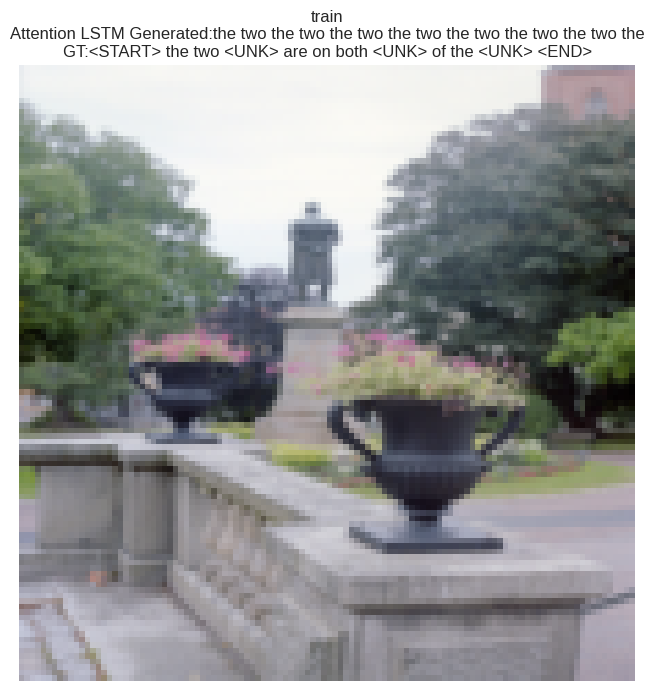

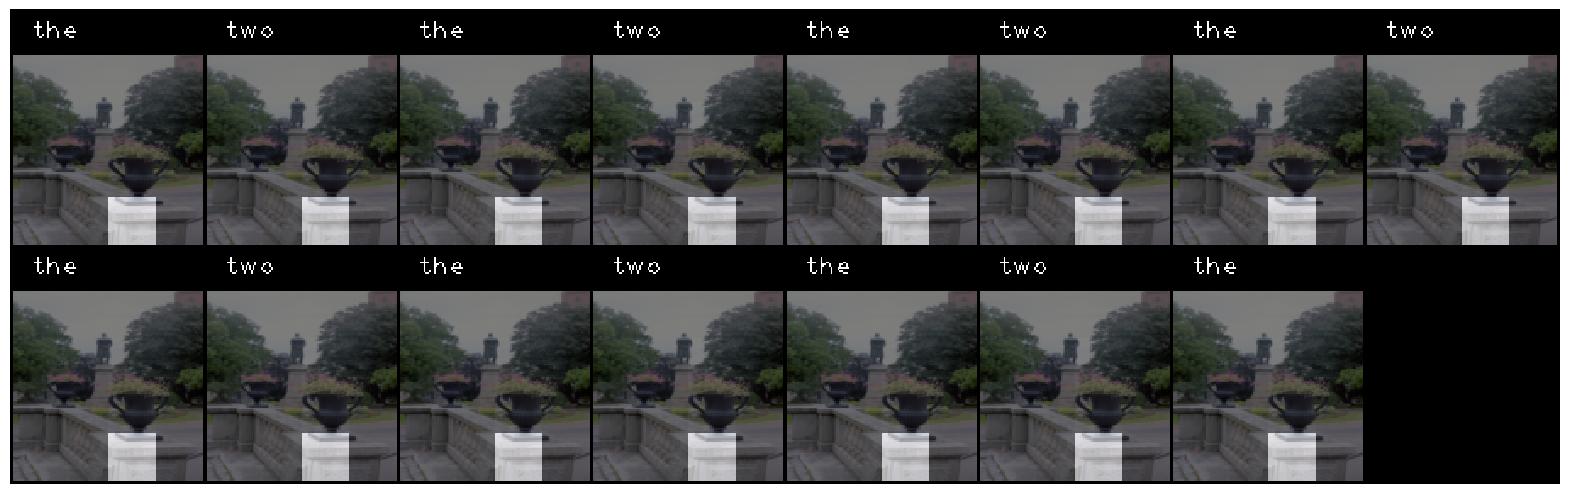

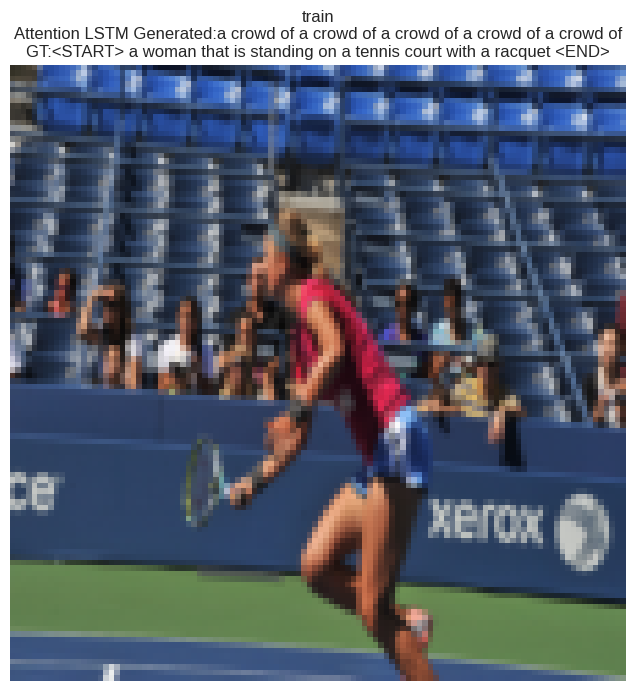

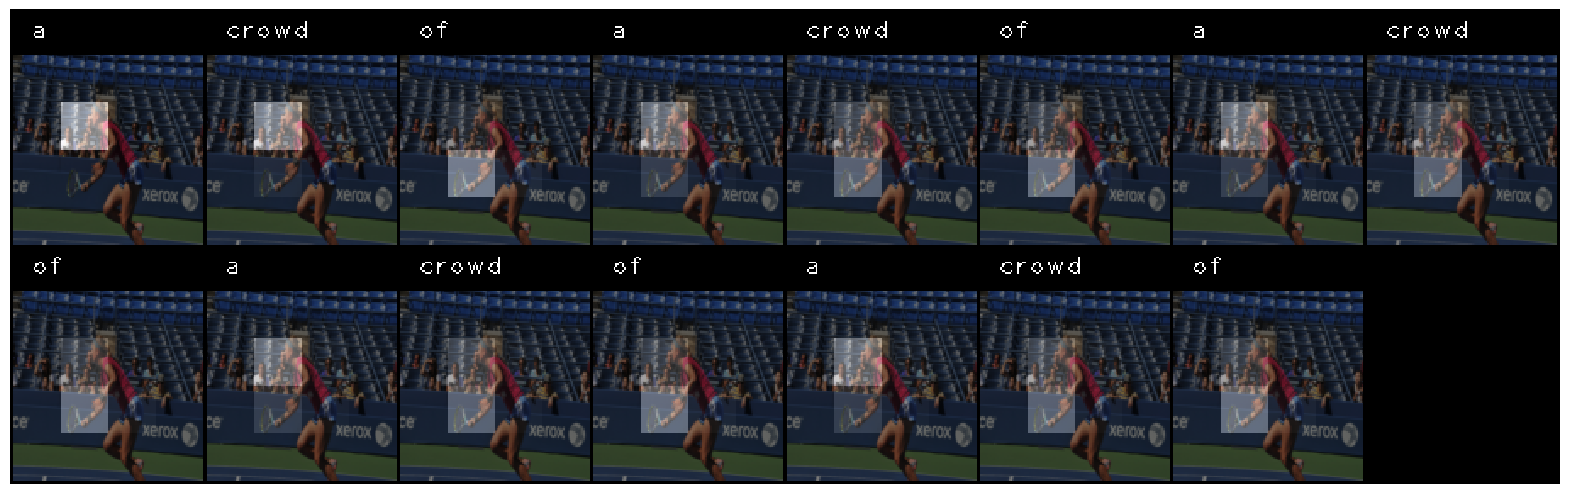

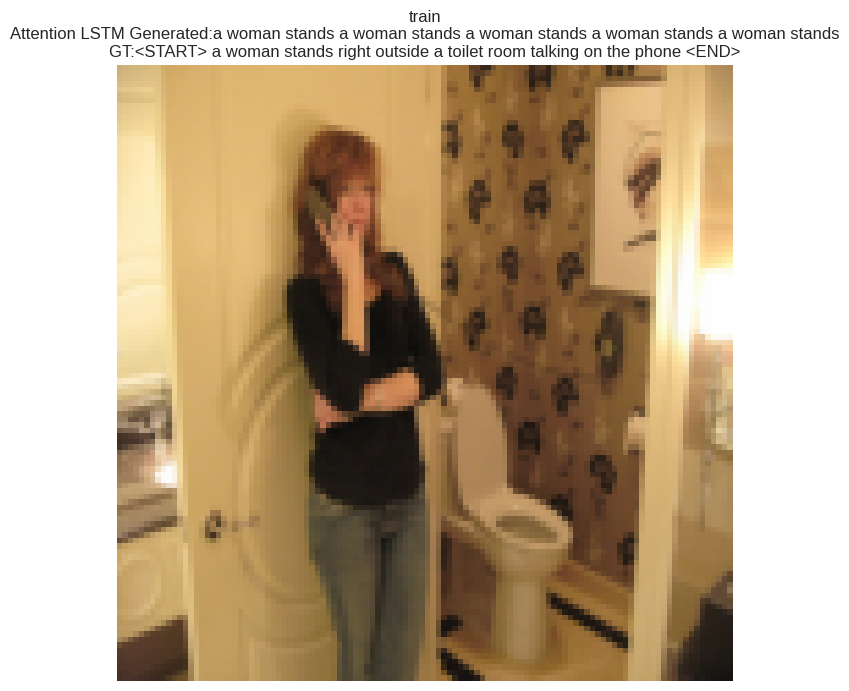

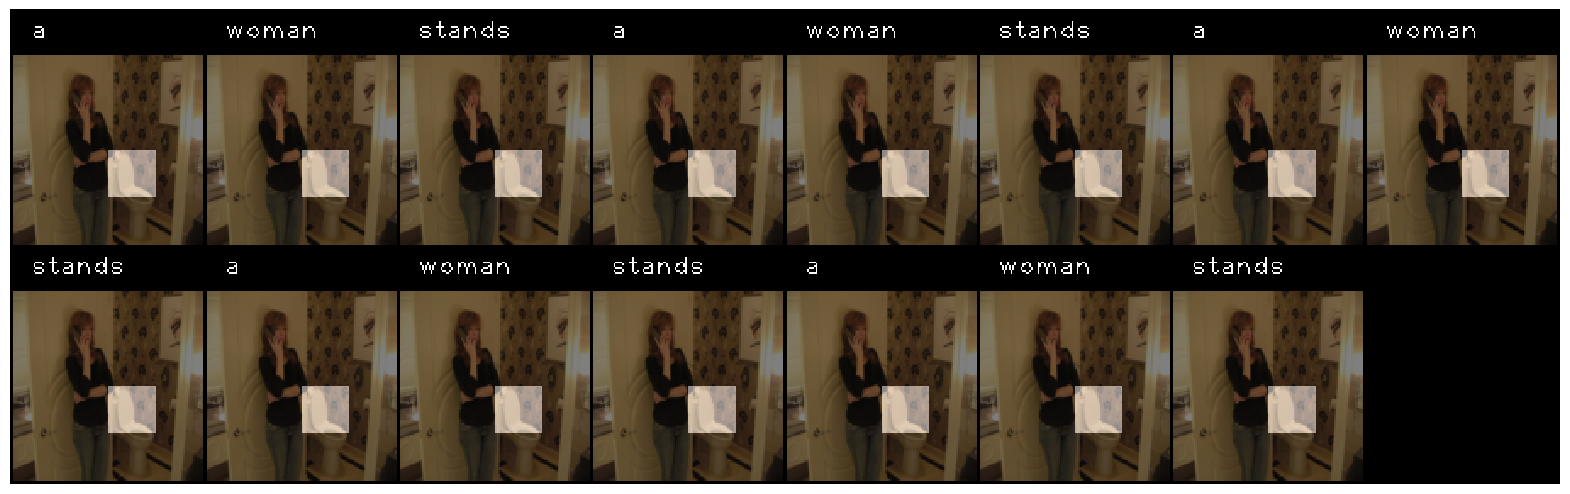

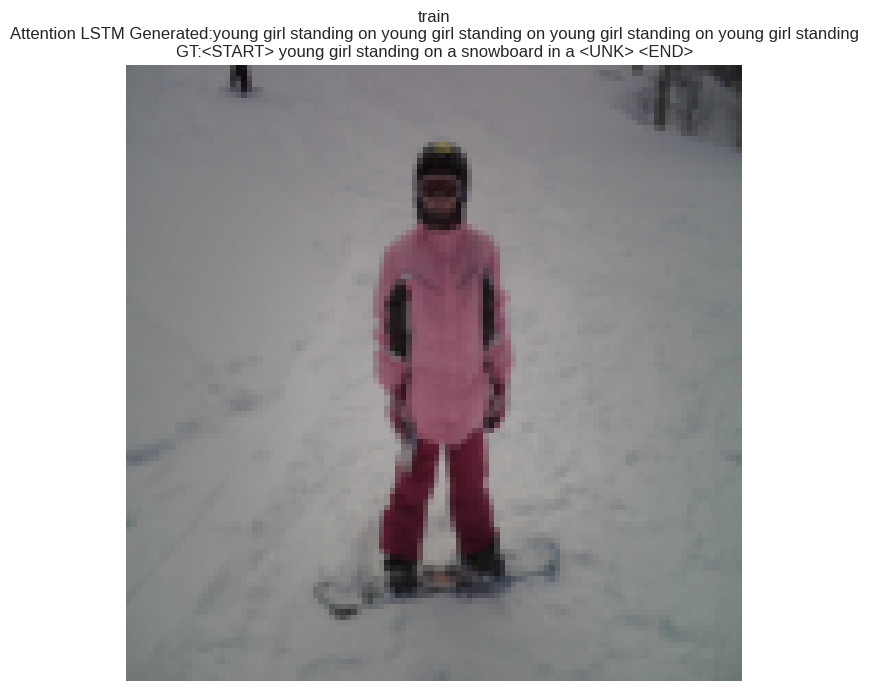

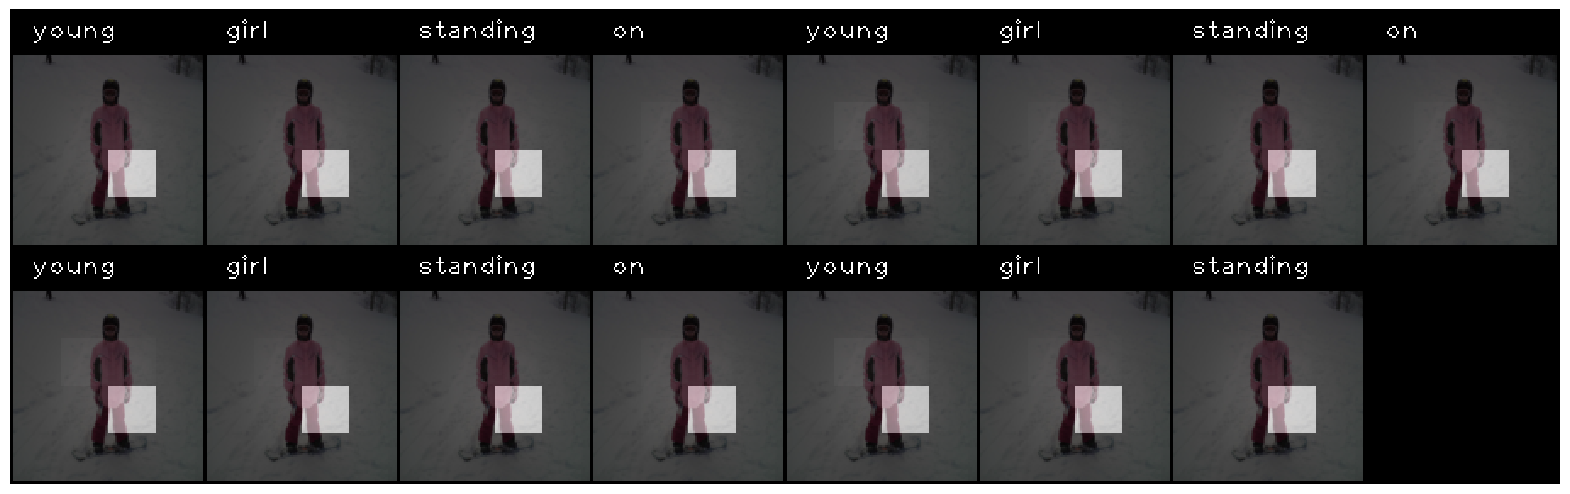

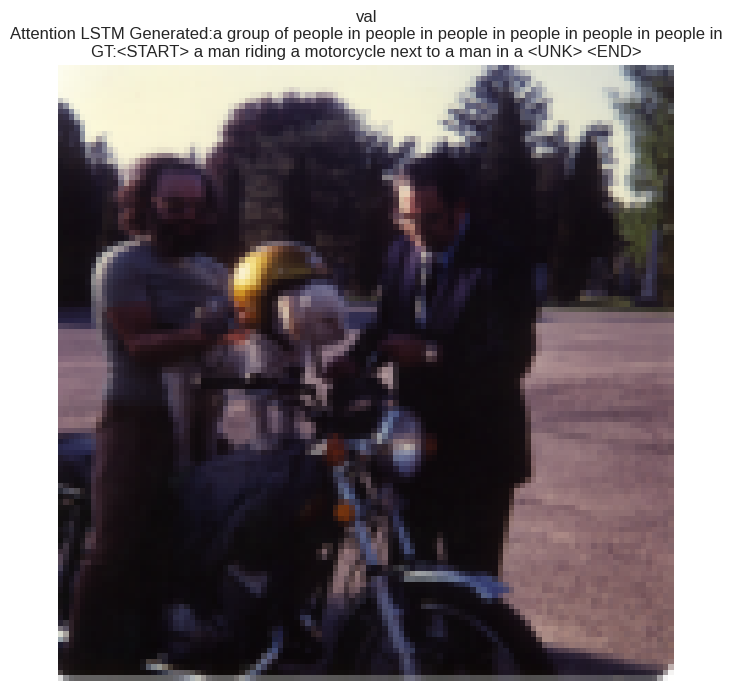

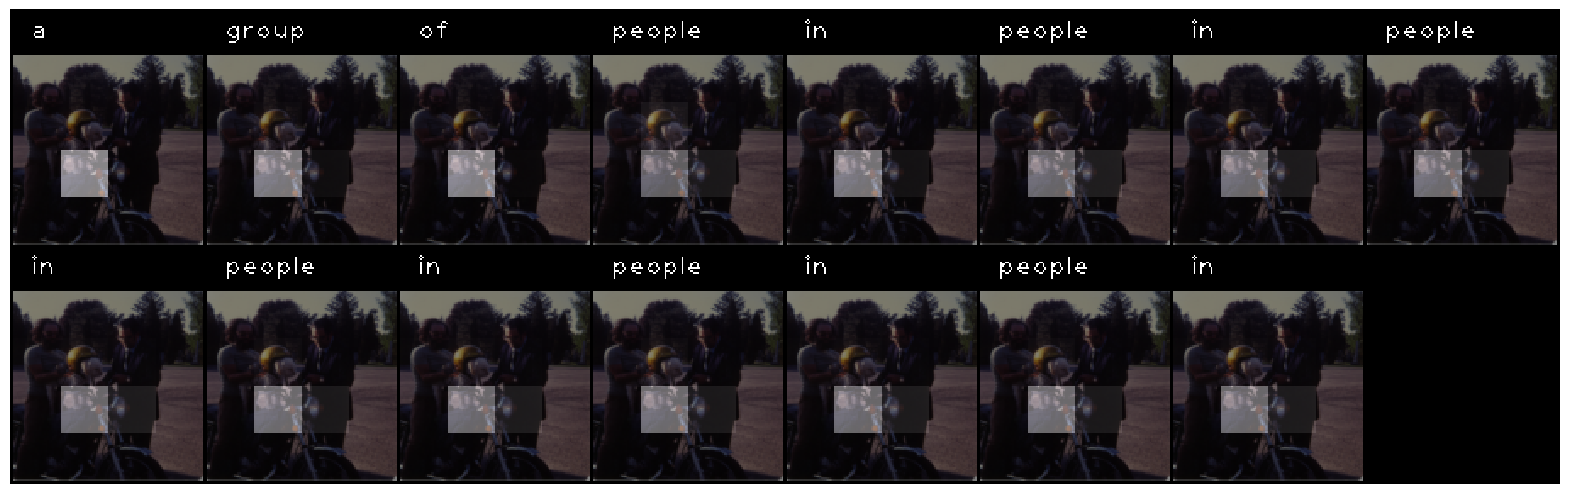

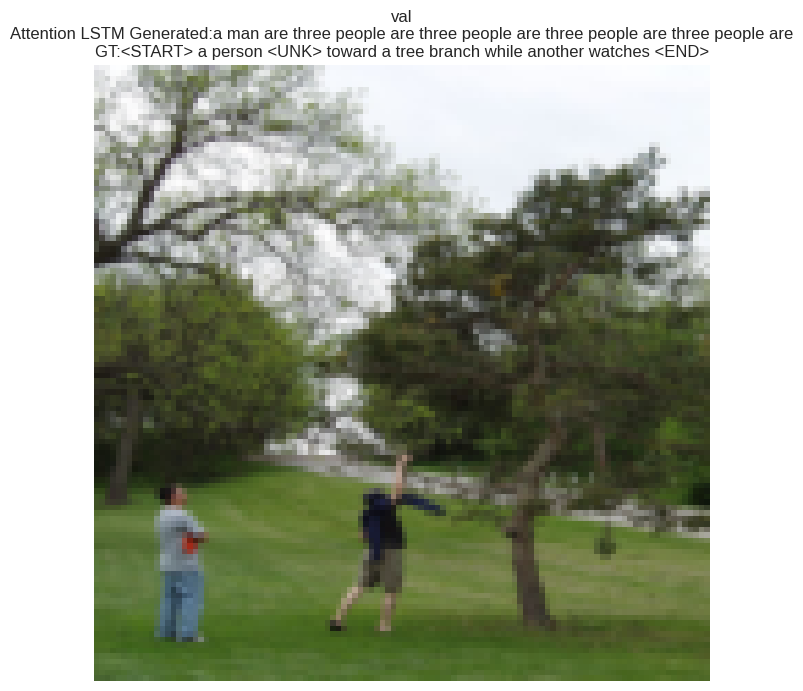

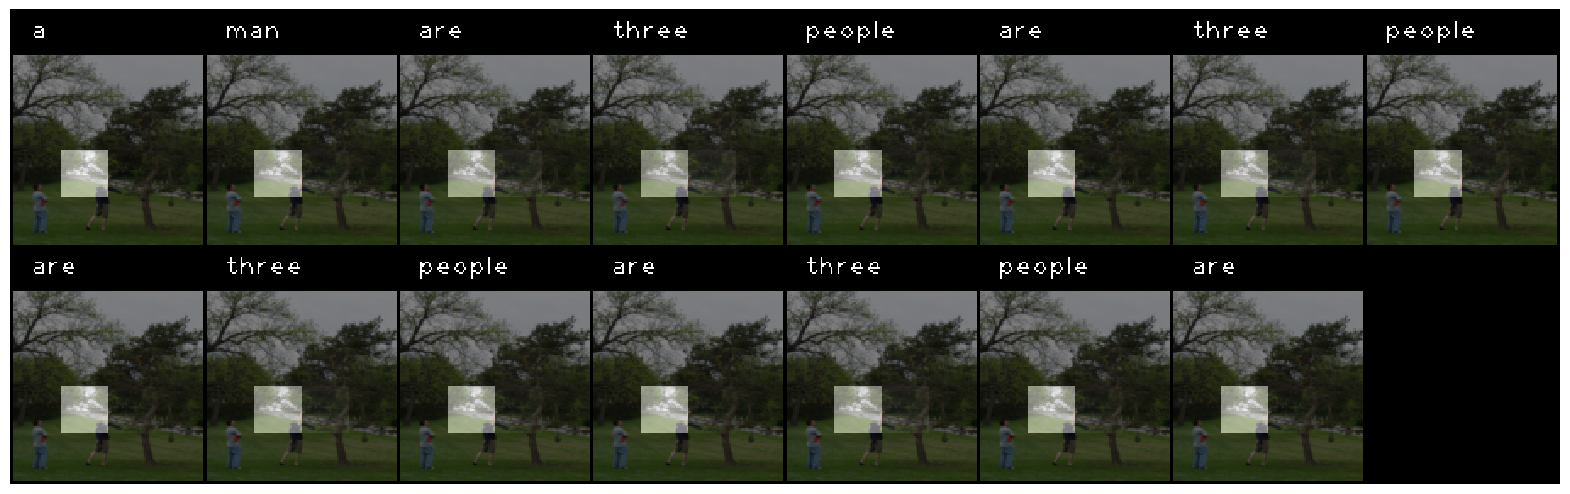

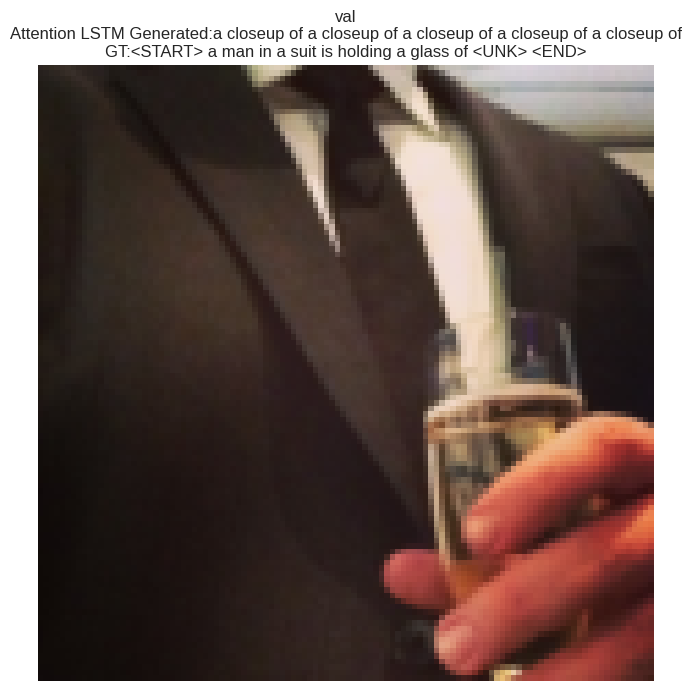

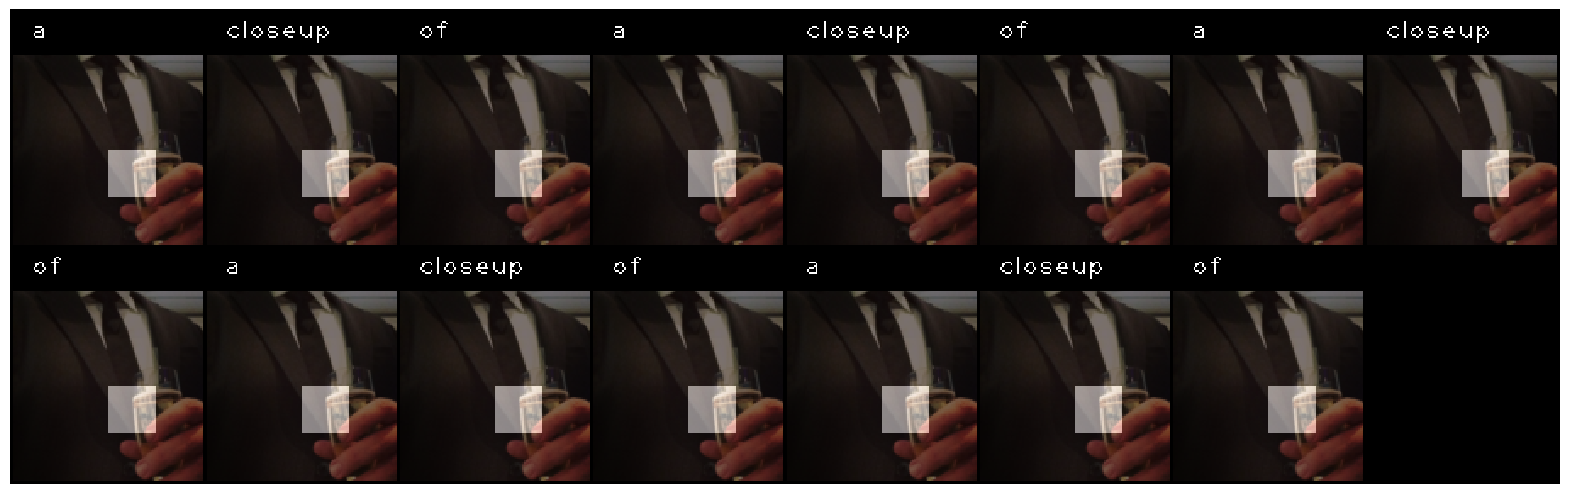

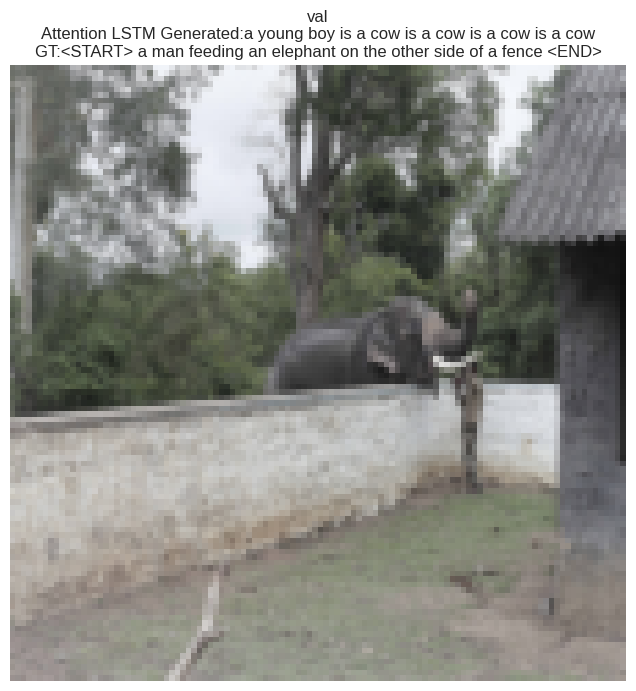

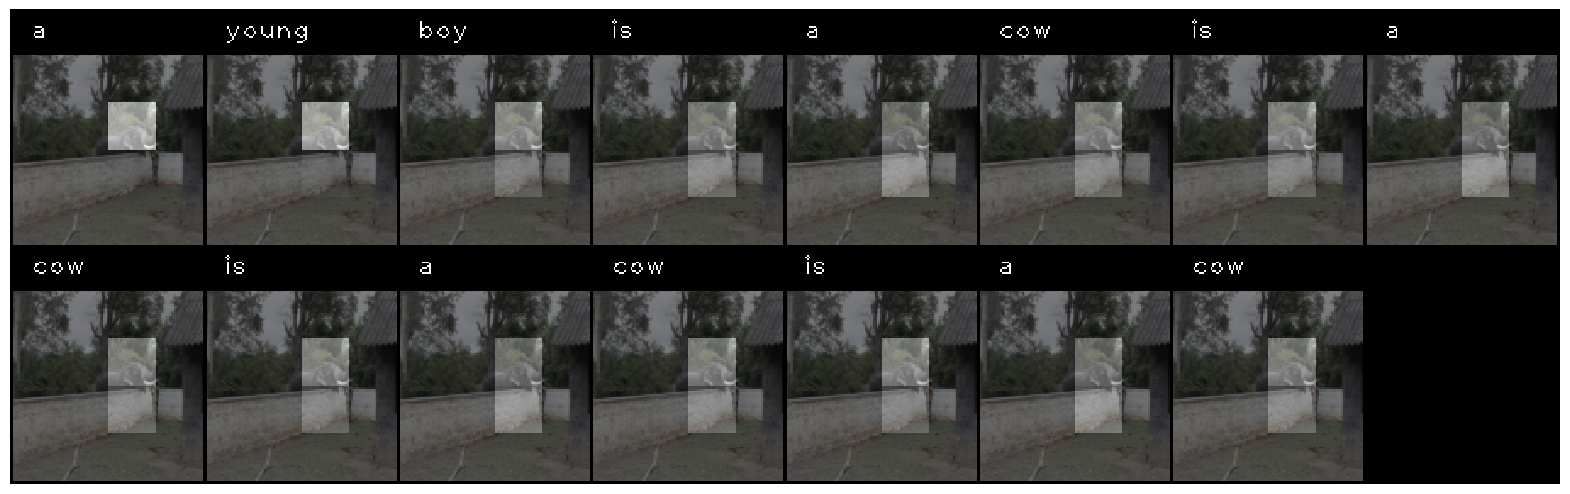

In [39]:
# Sample a minibatch and show the reshaped 112x112 images,
# GT captions, and generated captions by your model.

from torchvision import transforms
from torchvision.utils import make_grid

for split in ["train", "val"]:
    sample_idx = torch.randint(
        0, num_train if split == "train" else num_val, (VIS_BATCH_SIZE,)
    )
    sample_images = data_dict[split + "_images"][sample_idx]
    sample_captions = data_dict[split + "_captions"][sample_idx]

    # decode_captions is loaded from p4_utils.py
    gt_captions = decode_captions(sample_captions, data_dict["vocab"]["idx_to_token"])
    attn_model.eval()
    generated_captions, attn_weights_all = attn_model.sample(sample_images.to(DEVICE))
    generated_captions = decode_captions(
        generated_captions, data_dict["vocab"]["idx_to_token"]
    )

    for i in range(VIS_BATCH_SIZE):
        plt.imshow(sample_images[i].permute(1, 2, 0))
        plt.axis("off")
        plt.title(
            "%s\nAttention LSTM Generated:%s\nGT:%s"
            % (split, generated_captions[i], gt_captions[i])
        )
        plt.show()

        tokens = generated_captions[i].split(" ")

        vis_attn = []
        for j in range(len(tokens)):
            img = sample_images[i]
            attn_weights = attn_weights_all[i][j]
            token = tokens[j]
            img_copy = attention_visualizer(img, attn_weights, token)
            vis_attn.append(transforms.ToTensor()(img_copy))

        plt.rcParams["figure.figsize"] = (20.0, 20.0)
        vis_attn = make_grid(vis_attn, nrow=8)
        plt.imshow(torch.flip(vis_attn, dims=(0,)).permute(1, 2, 0))
        plt.axis("off")
        plt.show()
        plt.rcParams["figure.figsize"] = (10.0, 8.0)

# Save Results for Submission

Once you have finished all your implementation, run "Runtime -> Restart and run all..." to re-run all cells and display outputs.
Make sure all outputs are displayed properly and the outputs are same as what you expected!

Once all the cells are completed, execute the following cell to save the final losses for submission.

In [40]:
submission = {
    "rnn_losses": rnn_loss_submit,
    "lstm_losses": lstm_loss_submit,
    "attn_losses": attn_loss_submit,
}

try:
    submission_path = os.path.join(GOOGLE_DRIVE_PATH, "rnn_lstm_attention_submission.pt")
except NameError:
    submission_path = "rnn_lstm_attention_submission.pt"

torch.save(submission, submission_path)